# House Price Prediction Assignment

## Probelm Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house.

This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let us first import necessary libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_theme()

### 1.1 Read and verify data

In [4]:
# Read the dataset and verify with head function

house=pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.2 Inspect various other aspects of the bike sharing dataset

In [5]:
house.shape

(1460, 81)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 2. Data Cleaning

### 2.1 Fix null values

**Check unique values and fix according to the data dictionary for all the columns**

In [7]:
house.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [8]:
house.LotFrontage=house.LotFrontage.fillna(0.0)

In [9]:
house.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [10]:
house.Alley=house.Alley.fillna('NXS')

In [11]:
house.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [12]:
house.MasVnrType=house.MasVnrType.fillna('None')

In [13]:
house.MasVnrArea=house.MasVnrArea.fillna(0.0)

In [14]:
house.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [15]:
house.BsmtQual=house.BsmtQual.fillna("Nb")

In [16]:
house.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [17]:
house.BsmtCond=house.BsmtCond.fillna("Nb")

In [18]:
house.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [19]:
house.BsmtExposure=house.BsmtExposure.fillna("Nb")

In [20]:
house.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [21]:
house.BsmtFinType1=house.BsmtFinType1.fillna("Nb")

In [22]:
house.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [23]:
house.BsmtFinType2=house.BsmtFinType2.fillna("Nb")

In [24]:
house.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [25]:
house.FireplaceQu=house.FireplaceQu.fillna("Nf")

In [26]:
house.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [27]:
house.GarageType=house.GarageType.fillna("Ng")

In [28]:
house.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [29]:
house.GarageYrBlt=house.GarageYrBlt.fillna("Ng")

In [30]:
house.GarageFinish=house.GarageFinish.fillna("Ng")

In [31]:
house.GarageQual=house.GarageQual.fillna("Ng")

In [32]:
house.GarageCond=house.GarageCond.fillna("Ng")

In [33]:
house.PoolQC=house.PoolQC.fillna("Np")

In [34]:
house.Fence=house.Fence.fillna("Nf")

In [35]:
house.MiscFeature=house.MiscFeature.fillna("Nmf")

In [36]:
mode_electrical=house.Electrical.mode()[0]

In [37]:
house.Electrical=house.Electrical.fillna(mode_electrical)

In [38]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2.2 Remove unnecessary columns

In [39]:
house=house.drop('Id',axis=1)

### 2.3 Fix datatypes of columns according to data dictionary

In [40]:
# Converting month to categorical string

def convertMonth(x):
  return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

house[['MoSold']]=house[['MoSold']].apply(convertMonth)

In [41]:
# changing datatypes numeric of categorical values to object
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')

### 2.4 Treat Outliers

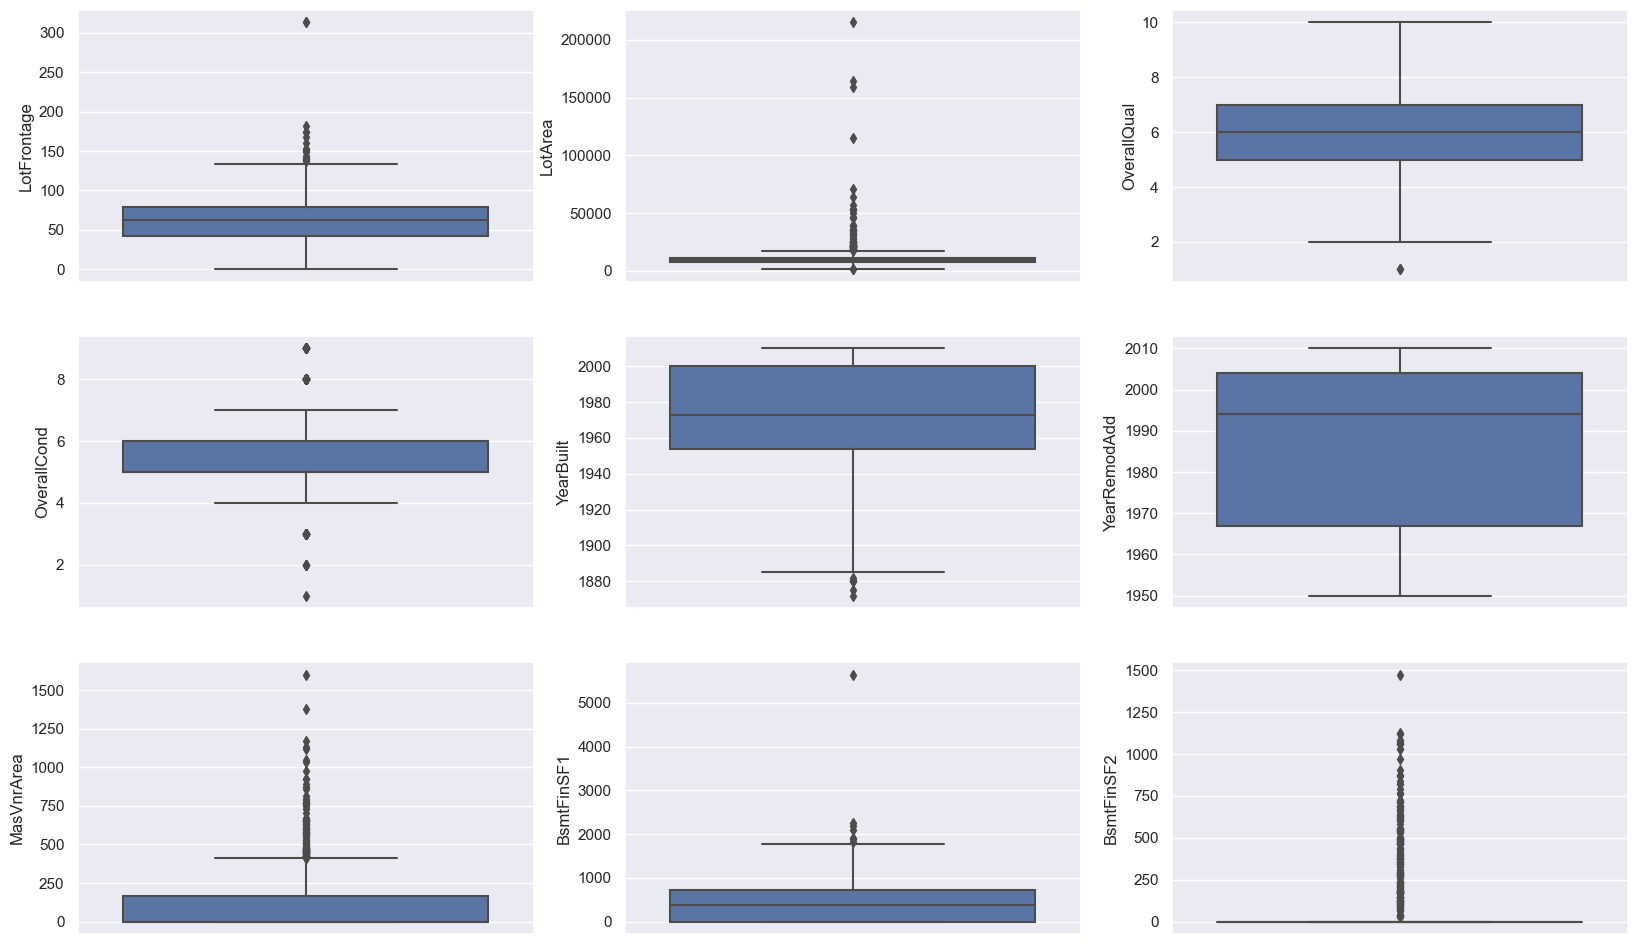

In [42]:
numeric_col=house.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 12))
for i in range(0,9):
  plt.subplot(3,3,i+1)
  sns.boxplot(y = numeric_col[i], data = house)
plt.show()

In [43]:
house=house[~(house.LotFrontage>200)]

In [44]:
house[house.LotArea>40000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,20,RL,68.0,50271,Pave,NXS,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,Np,Nf,Nmf,0,Nov,2006,WD,Normal,385000
249,50,RL,0.0,159000,Pave,NXS,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,Np,Nf,Shed,500,Jun,2007,WD,Normal,277000
313,20,RL,150.0,215245,Pave,NXS,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,Np,Nf,Nmf,0,Jun,2009,WD,Normal,375000
335,190,RL,0.0,164660,Grvl,NXS,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,Np,Nf,Shed,700,Aug,2008,WD,Normal,228950
384,60,RL,0.0,53107,Pave,NXS,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985,Unf,0,595,1580,GasA,Ex,Y,SBrkr,1079,874,0,1953,1,0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,1992.0,Fin,2,501,TA,TA,Y,216,231,0,0,0,0,Np,Nf,Nmf,0,Jun,2007,WD,Normal,240000
451,20,RL,62.0,70761,Pave,NXS,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,Np,Nf,Nmf,0,Dec,2006,WD,Normal,280000
457,20,RL,0.0,53227,Pave,NXS,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116,Unf,0,248,1364,GasA,Ex,Y,SBrkr,1663,0,0,1663,1,0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954.0,Fin,2,529,TA,TA,Y,224,137,0,0,0,0,Np,Nf,Nmf,0,Mar,2008,WD,Normal,256000
523,60,RL,130.0,40094,Pave,NXS,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,Np,Nf,Nmf,0,Oct,2007,New,Partial,184750
661,60,RL,52.0,46589,Pave,NXS,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1994,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,528.0,Gd,TA,PConc,Gd,Gd,No,GLQ,1361,Rec,180,88,1629,GasA,Ex,Y,SBrkr,1686,762,0,2448,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1994.0,RFn,3,711,TA,TA,Y,517,76,0,0,0,0,Np,Nf,Nmf,0,Jul,2009,WD,Normal,402000
706,20,RL,0.0,115149,Pave,NXS,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,16

In [45]:
house=house[~(house.LotArea>40000)]

In [46]:
house[house.OverallQual<2]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
375,30,RL,0.0,10020,Pave,NXS,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350,Unf,0,333,683,GasA,Gd,N,FuseA,904,0,0,904,1,0,0,1,1,1,Fa,4,Maj1,0,Nf,Ng,Ng,Ng,0,0,Ng,Ng,Y,0,0,0,0,0,0,Np,Nf,Nmf,0,Mar,2009,WD,Normal,61000
533,20,RL,50.0,5000,Pave,NXS,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,Nb,Nb,Nb,Nb,0,Nb,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,Nf,Ng,Ng,Ng,0,0,Ng,Ng,N,0,0,0,0,0,0,Np,Nf,Nmf,0,Jan,2007,WD,Normal,39300


In [47]:
house=house[~(house.OverallQual<2)]

In [48]:
house[house.MasVnrArea>1250]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,Np,Nf,Nmf,0,Jun,2007,WD,Normal,239000
1169,60,RL,118.0,35760,Pave,NXS,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,Np,Nf,Nmf,0,Jul,2006,WD,Normal,625000


In [49]:
house=house[~(house.MasVnrArea>1250)]

In [50]:
house[house.BsmtFinSF2>1250]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,60,RL,86.0,10380,Pave,NXS,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1986,1987,Gable,CompShg,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28,ALQ,1474,0,1502,GasA,Ex,Y,SBrkr,1553,1177,0,2730,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1987.0,Fin,2,576,TA,TA,Y,201,96,0,0,0,0,Np,MnPrv,Nmf,0,Aug,2007,WD,Normal,301000


In [51]:
house=house[~(house.BsmtFinSF2>1250)]

In [52]:
house[house.BsmtFinSF1>1800]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
70,20,RL,95.0,13651,Pave,NXS,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880,Unf,0,343,2223,GasA,Ex,Y,SBrkr,2223,0,0,2223,1,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2,516,TA,TA,Y,300,0,0,0,0,0,Np,Nf,Nmf,0,Feb,2007,WD,Normal,244000
178,20,RL,63.0,17423,Pave,NXS,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,Np,Nf,Nmf,0,Jul,2009,New,Partial,501837
898,20,RL,100.0,12919,Pave,NXS,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,Np,Nf,Nmf,0,Mar,2010,New,Partial,611657
1182,60,RL,160.0,15623,Pave,NXS,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,Nmf,0,Jul,2007,WD,Abnorml,745000


In [53]:
house=house[~(house.BsmtFinSF1>1800)]

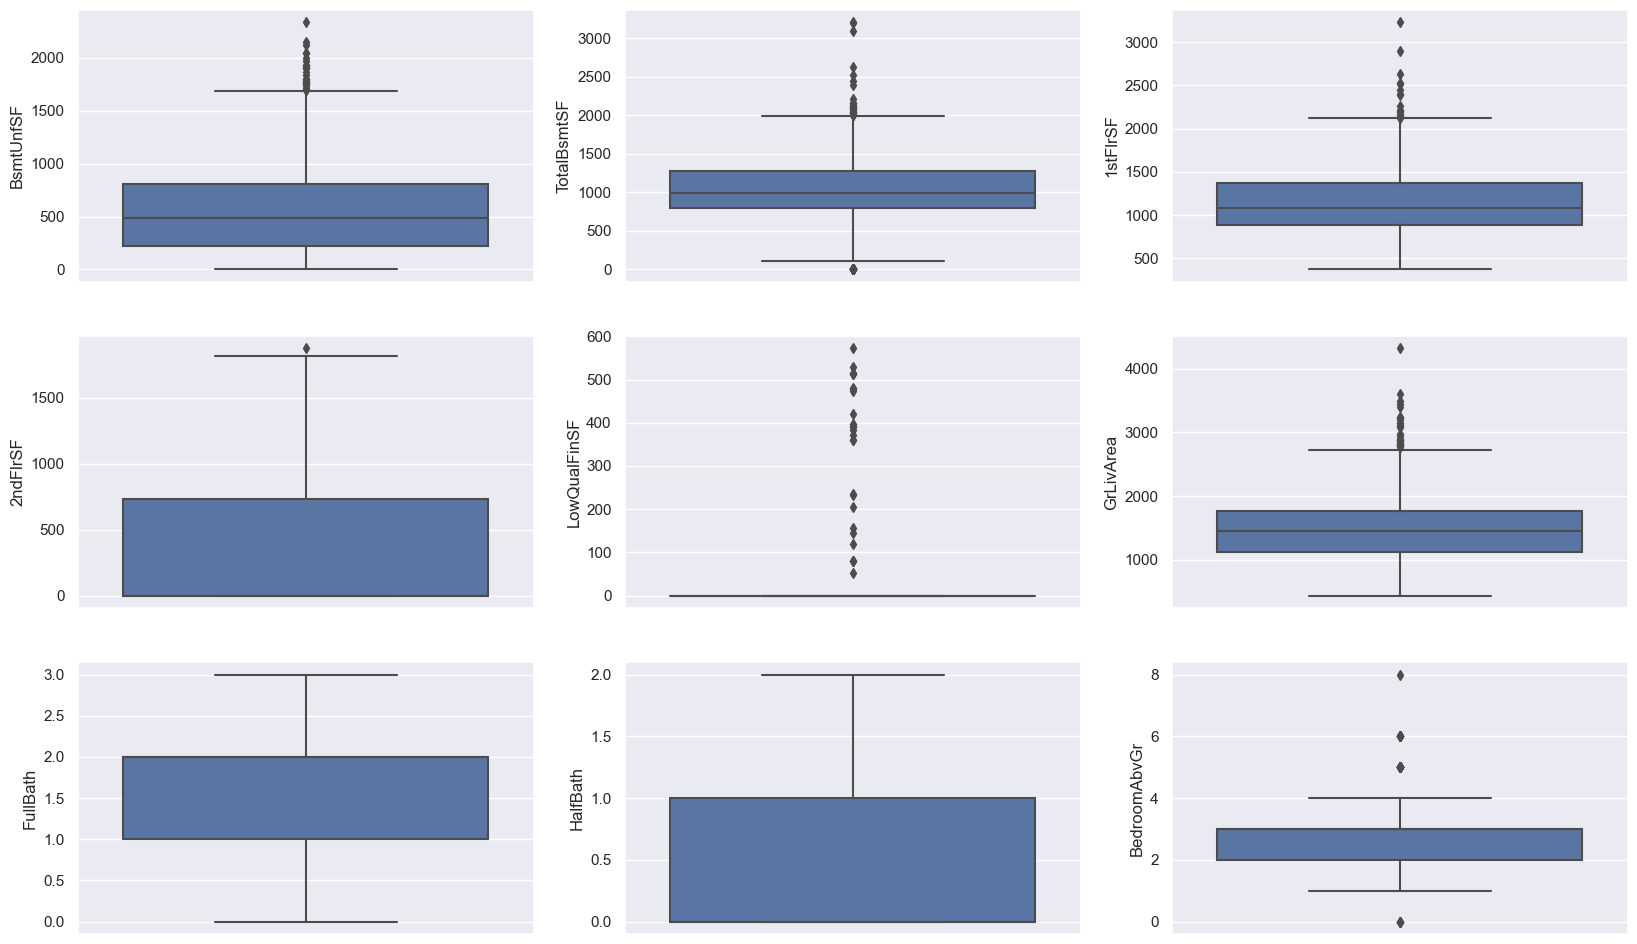

In [54]:
plt.figure(figsize=(20, 12))
for i in range(9,18):
  plt.subplot(3,3,i-8)
  sns.boxplot(y = numeric_col[i], data = house)
plt.show()

In [55]:
house[house.BsmtUnfSF>2200]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
224,20,RL,103.0,13472,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56,Unf,0,2336,2392,GasA,Ex,Y,SBrkr,2392,0,0,2392,0,0,2,0,3,1,Ex,8,Typ,1,Ex,Attchd,2003.0,Fin,3,968,TA,TA,Y,248,105,0,0,0,0,Np,Nf,Nmf,0,Jun,2009,WD,Normal,386250


In [56]:
house=house[~(house.BsmtUnfSF>2200)]

In [57]:
house[house.TotalBsmtSF>2400]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,85.0,10655,Pave,NXS,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,Nb,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,Np,Nf,Nmf,0,Oct,2009,WD,Normal,284000
440,20,RL,105.0,15431,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,Np,Nf,Nmf,0,Apr,2009,WD,Normal,555000
496,20,RL,0.0,12692,Pave,NXS,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231,Unf,0,1969,3200,GasA,Ex,Y,SBrkr,3228,0,0,3228,1,0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1992.0,RFn,2,546,TA,TA,Y,264,75,291,0,0,0,Np,Nf,Nmf,0,May,2007,WD,Normal,430000
691,60,RL,104.0,21535,Pave,NXS,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,Np,Nf,Nmf,0,Jan,2007,WD,Normal,755000
1044,20,RL,80.0,9600,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,1Story,8,5,1981,1981,Hip,WdShngl,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,1104,Unf,0,1420,2524,GasA,TA,Y,SBrkr,2524,0,0,2524,1,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1981.0,Fin,2,542,TA,TA,Y,474,120,0,0,0,0,Np,MnPrv,Nmf,0,Jul,2009,WD,Normal,278000
1373,20,RL,0.0,11400,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,Ex,Y,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,Np,Nf,Nmf,0,Mar,2007,WD,Normal,466500


In [58]:
house=house[~(house.TotalBsmtSF>2400)]

In [59]:
house[house['1stFlrSF']>2400]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
529,20,RL,0.0,32668,Pave,NXS,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,None,0.0,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,Np,Nf,Nmf,0,Mar,2007,WD,Alloca,200624
1024,20,RL,0.0,15498,Pave,NXS,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1976,1976,Hip,WdShake,Stone,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,ALQ,1165,LwQ,400,0,1565,GasA,TA,Y,SBrkr,2898,0,0,2898,1,0,2,0,2,1,Gd,10,Typ,1,Gd,Attchd,1976.0,Fin,2,665,TA,TA,Y,0,72,174,0,0,0,Np,Nf,Nmf,0,May,2008,COD,Abnorml,287000


In [60]:
house=house[~(house['1stFlrSF']>2400)]

In [61]:
house[house.LowQualFinSF>400]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,50,C (all),105.0,8470,Pave,NXS,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,Nf,Ng,Ng,Ng,0,0,Ng,Ng,N,0,0,156,0,0,0,Np,MnPrv,Nmf,0,Oct,2009,ConLD,Abnorml,85000
170,50,RM,0.0,12358,Pave,NXS,IR1,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,5,6,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,360,Unf,0,360,720,GasA,TA,Y,SBrkr,854,0,528,1382,0,0,1,1,2,1,TA,7,Typ,0,Nf,Detchd,1991.0,Unf,2,660,TA,TA,Y,237,0,0,0,0,0,Np,Nf,Nmf,0,May,2007,WD,Normal,128500
185,75,RM,90.0,22950,Pave,NXS,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,Np,GdPrv,Nmf,0,Jun,2006,WD,Normal,475000
267,75,RL,60.0,8400,Pave,NXS,Reg,Bnk,AllPub,Inside,Mod,SWISU,Norm,Norm,1Fam,2.5Fin,5,8,1939,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,LwQ,378,Unf,0,342,720,GasA,Ex,Y,SBrkr,1052,720,420,2192,0,0,2,1,4,1,Gd,8,Typ,1,Gd,Detchd,1939.0,Unf,1,240,TA,TA,Y,262,24,0,0,0,0,Np,Nf,Nmf,0,Jul,2008,WD,Normal,179500
406,50,RL,51.0,10480,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,6,5,1936,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1064,1064,GasA,Ex,Y,FuseA,1166,0,473,1639,0,0,1,0,3,1,TA,6,Maj2,0,Nf,Detchd,1936.0,Unf,1,240,TA,TA,Y,0,0,0,0,0,0,Np,Nf,Nmf,0,Mar,2008,WD,Normal,115000
635,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,Nf,Ng,Ng,Ng,0,0,Ng,Ng,N,0,110,0,0,0,0,Np,Nf,Nmf,0,Mar,2007,WD,Abnorml,200000
883,75,RL,60.0,6204,Pave,NXS,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2.5Fin,4,5,1912,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,TA,Fa,No,Unf,0,Unf,0,795,795,GasA,TA,N,SBrkr,954,795,481,2230,1,0,1,0,5,1,TA,10,Typ,0,Nf,Detchd,1997.0,Unf,1,440,TA,Gd,Y,0,188,0,0,0,0,Np,Nf,Nmf,0,Mar,2006,WD,Normal,118500
1009,50,RL,60.0,6000,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,1926,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Ex,Y,SBrkr,1008,0,514,1522,0,0,2,0,4,1,TA,7,Typ,0,Nf,Ng,Ng,Ng,0,0,Ng,Ng,P,0,0,138,0,0,0,Np,Nf,Nmf,0,Jun,2006,WD,Normal,102000
1173,50,RL,138.0,18030,Pave,NXS,IR1,Bnk,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,6,1946,1994,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,152,BLQ,469,977,1598,GasA,TA,Y,SBrkr,1636,971,479,3086,0,0,3,0,3,1,Ex,12,Maj1,1,Gd,Ng,Ng,Ng,0,0,Ng,Ng,Y,122,0,0,0,0,0,Np,MnPrv,Nmf,0,Mar,2007,WD,Normal,200500


In [62]:
house=house[~(house.LowQualFinSF>400)]

In [63]:
house[house.GrLivArea>3300]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
304,75,RM,87.0,18386,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1470,1470,GasA,Ex,Y,SBrkr,1675,1818,0,3493,0,0,3,0,3,1,Gd,10,Typ,1,Ex,Attchd,2003.0,Unf,3,870,TA,TA,Y,302,0,0,0,0,0,Np,Nf,Nmf,0,May,2008,WD,Normal,295000
1268,50,RL,0.0,14100,Pave,NXS,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,9,1935,1997,Gable,CompShg,Stucco,Stucco,BrkFace,632.0,TA,Gd,CBlock,TA,TA,Mn,Rec,192,Unf,0,536,728,GasA,Ex,Y,SBrkr,1968,1479,0,3447,0,0,3,1,4,1,Gd,11,Typ,2,Gd,BuiltIn,1982.0,Unf,3,1014,TA,TA,Y,314,12,0,0,0,0,Np,GdWo,Nmf,0,May,2008,WD,Normal,381000


In [64]:
house=house[~(house.GrLivArea>3300)]

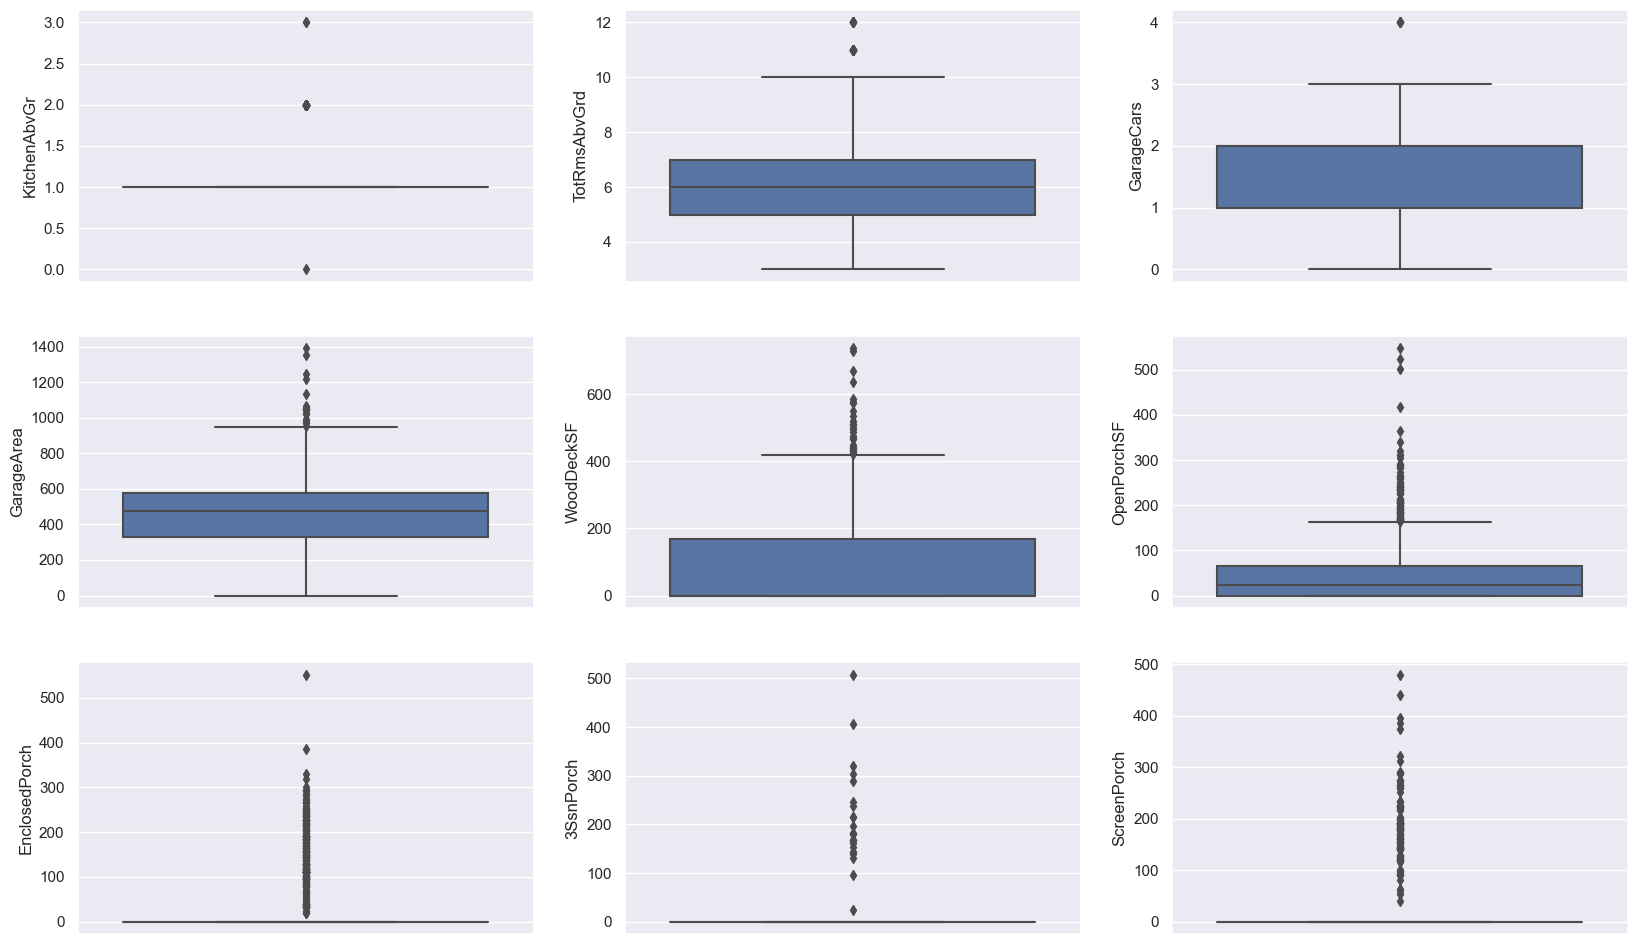

In [65]:
plt.figure(figsize=(20, 12))
for i in range(18,27):
  plt.subplot(3,3,i-17)
  sns.boxplot(y = numeric_col[i], data = house)
plt.show()

In [66]:
house[house.GarageArea>1100]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,20,RL,98.0,12704,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.0,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,Np,Nf,Nmf,0,Aug,2009,New,Partial,253293
664,20,RL,49.0,20896,Pave,NXS,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721,Unf,0,356,2077,GasA,Ex,Y,SBrkr,2097,0,0,2097,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2005.0,Fin,3,1134,TA,TA,Y,192,267,0,0,0,0,Np,Nf,Nmf,0,Jan,2006,New,Partial,423000
825,20,RL,114.0,14803,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,2078,GasA,Ex,Y,SBrkr,2084,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007.0,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,Np,Nf,Nmf,0,Jun,2008,New,Partial,385000
1061,30,C (all),120.0,18000,Grvl,NXS,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,Nf,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,Np,Nf,Shed,560,Aug,2008,ConLD,Normal,81000
1190,190,RL,0.0,32463,Pave,NXS,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,Np,Nf,Nmf,0,Mar,2007,WD,Normal,168000


In [67]:
house=house[~(house.GarageArea>1100)]

In [68]:
house[house.WoodDeckSF>600]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1068,160,RM,42.0,3964,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,6,4,1973,1973,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,837,Unf,0,105,942,GasA,Gd,Y,SBrkr,1291,1230,0,2521,1,0,2,1,5,1,TA,10,Maj1,1,Gd,Attchd,1973.0,Fin,2,576,TA,TA,Y,728,20,0,0,0,0,Np,GdPrv,Nmf,0,Jun,2006,WD,Normal,151400
1210,60,RL,70.0,11218,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1055,1055,GasA,Ex,Y,SBrkr,1055,790,0,1845,0,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1992.0,RFn,2,462,TA,TA,Y,635,104,0,0,0,0,Np,GdPrv,Shed,400,May,2010,WD,Normal,189000
1313,60,RL,108.0,14774,Pave,NXS,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,165.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1393,1393,GasA,Ex,Y,SBrkr,1422,1177,0,2599,0,0,2,1,4,1,Gd,10,Typ,1,TA,BuiltIn,1999.0,Fin,3,779,TA,TA,Y,668,30,0,0,0,0,Np,Nf,Nmf,0,May,2010,WD,Normal,333168
1459,20,RL,75.0,9937,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,Nf,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,Np,Nf,Nmf,0,Jun,2008,WD,Normal,147500


In [69]:
house=house[~(house.WoodDeckSF>600)]

In [70]:
house[house.OpenPorchSF>300]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,30,C (all),60.0,7879,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,Nf,Ng,Ng,Ng,0,0,Ng,Ng,N,0,523,115,0,0,0,Np,GdWo,Nmf,0,Nov,2009,WD,Abnorml,34900
583,75,RM,75.0,13500,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.0,Unf,2,880,Gd,TA,Y,105,502,0,0,0,0,Np,Nf,Nmf,0,Jul,2008,WD,Normal,325000
645,20,RL,0.0,10530,Pave,NXS,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1971,1971,Hip,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,282,LwQ,35,664,981,GasA,TA,Y,SBrkr,981,0,0,981,1,0,1,1,3,1,TA,5,Typ,0,Nf,Detchd,1979.0,Unf,2,576,TA,TA,Y,0,312,40,0,0,0,Np,Nf,Nmf,0,Mar,2007,WD,Normal,143250
735,75,RM,60.0,10800,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,7,1914,1970,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,Mn,Rec,390,Unf,0,490,880,GasW,Fa,N,SBrkr,880,888,0,1768,0,0,1,1,2,1,TA,6,Typ,2,TA,Detchd,1914.0,Unf,2,320,TA,TA,N,0,341,0,0,0,0,Np,Nf,Nmf,0,Oct,2006,WD,Normal,163000
807,70,RL,144.0,21384,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,5,6,1923,2004,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Gd,GLQ,1309,Unf,0,15,1324,GasA,Ex,Y,SBrkr,1072,504,0,1576,2,0,1,1,3,1,Gd,6,Typ,1,TA,Attchd,1923.0,RFn,2,528,TA,TA,Y,0,312,0,0,0,0,Np,Nf,Nmf,0,May,2009,WD,Normal,223500
854,20,RL,102.0,17920,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1955,1974,Hip,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,306,Rec,1085,372,1763,GasA,TA,Y,SBrkr,1779,0,0,1779,1,0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1955.0,Unf,2,454,TA,TA,Y,0,418,0,0,312,0,Np,Nf,Nmf,0,Jul,2006,WD,Abnorml,170000
875,60,FV,75.0,9000,Pave,NXS,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,64,Unf,0,1120,1184,GasA,Ex,Y,SBrkr,1184,1426,0,2610,0,0,2,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,2,550,TA,TA,Y,208,364,0,0,0,0,Np,Nf,Nmf,0,Aug,2007,New,Partial,303477
996,20,RL,0.0,10659,Pave,NXS,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1961,1961,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,915,Unf,0,135,1050,GasA,TA,Y,SBrkr,1050,0,0,1050,1,0,1,0,3,1,TA,6,Typ,0,Nf,Attchd,1961.0,Unf,1,368,TA,TA,Y,0,319,0,0,0,0,Np,Nf,Nmf,0,Jan,2006,COD,Normal,136500
1193,120,RM,0.0,4500,Pave,NXS,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1999,1999,Hip,CompShg,VinylSd,VinylSd,BrkFace,425.0,TA,TA,PConc,Ex,TA,No,GLQ,883,Unf,0,341,1224,GasA,Ex,Y,SBrkr,1224,0,0,1224,1,0,2,0,2,1,TA,5,Typ,0,Nf,Attchd,1999.0,Fin,2,402,TA,TA,Y,0,304,0,0,0,0,Np,Nf,Nmf,0,Jun,2009,WD,Normal,165000
1328,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,1510,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0,0,2,

In [71]:
house=house[~(house.OpenPorchSF>300)]

In [72]:
house[house.EnclosedPorch>500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,NXS,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,Nmf,0,Mar,2006,WD,Abnorml,235000


In [73]:
house=house[~(house.EnclosedPorch>500)]

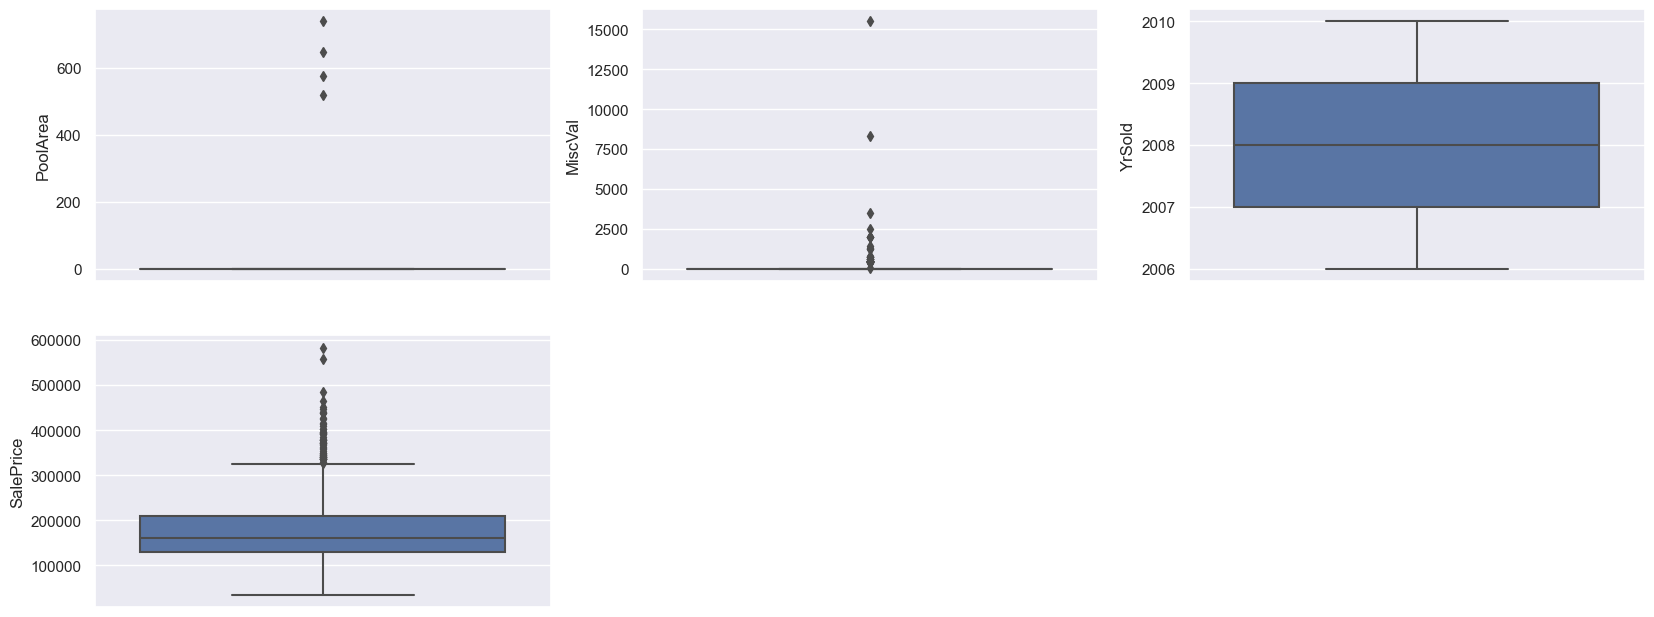

In [74]:
plt.figure(figsize=(20, 12))
for i in range(27,31):
  plt.subplot(3,3,i-26)
  sns.boxplot(y = numeric_col[i], data = house)
plt.show()

## Step 3: Visualizing the data

In [75]:
# subset all numerical variables
house_numeric = house.select_dtypes(include=['float64', 'int64'])
print(house_numeric.shape)

# subset all categorical variables
house_categorical = house.select_dtypes(include=['object'])
print(house_categorical.shape)

(1396, 31)
(1396, 49)


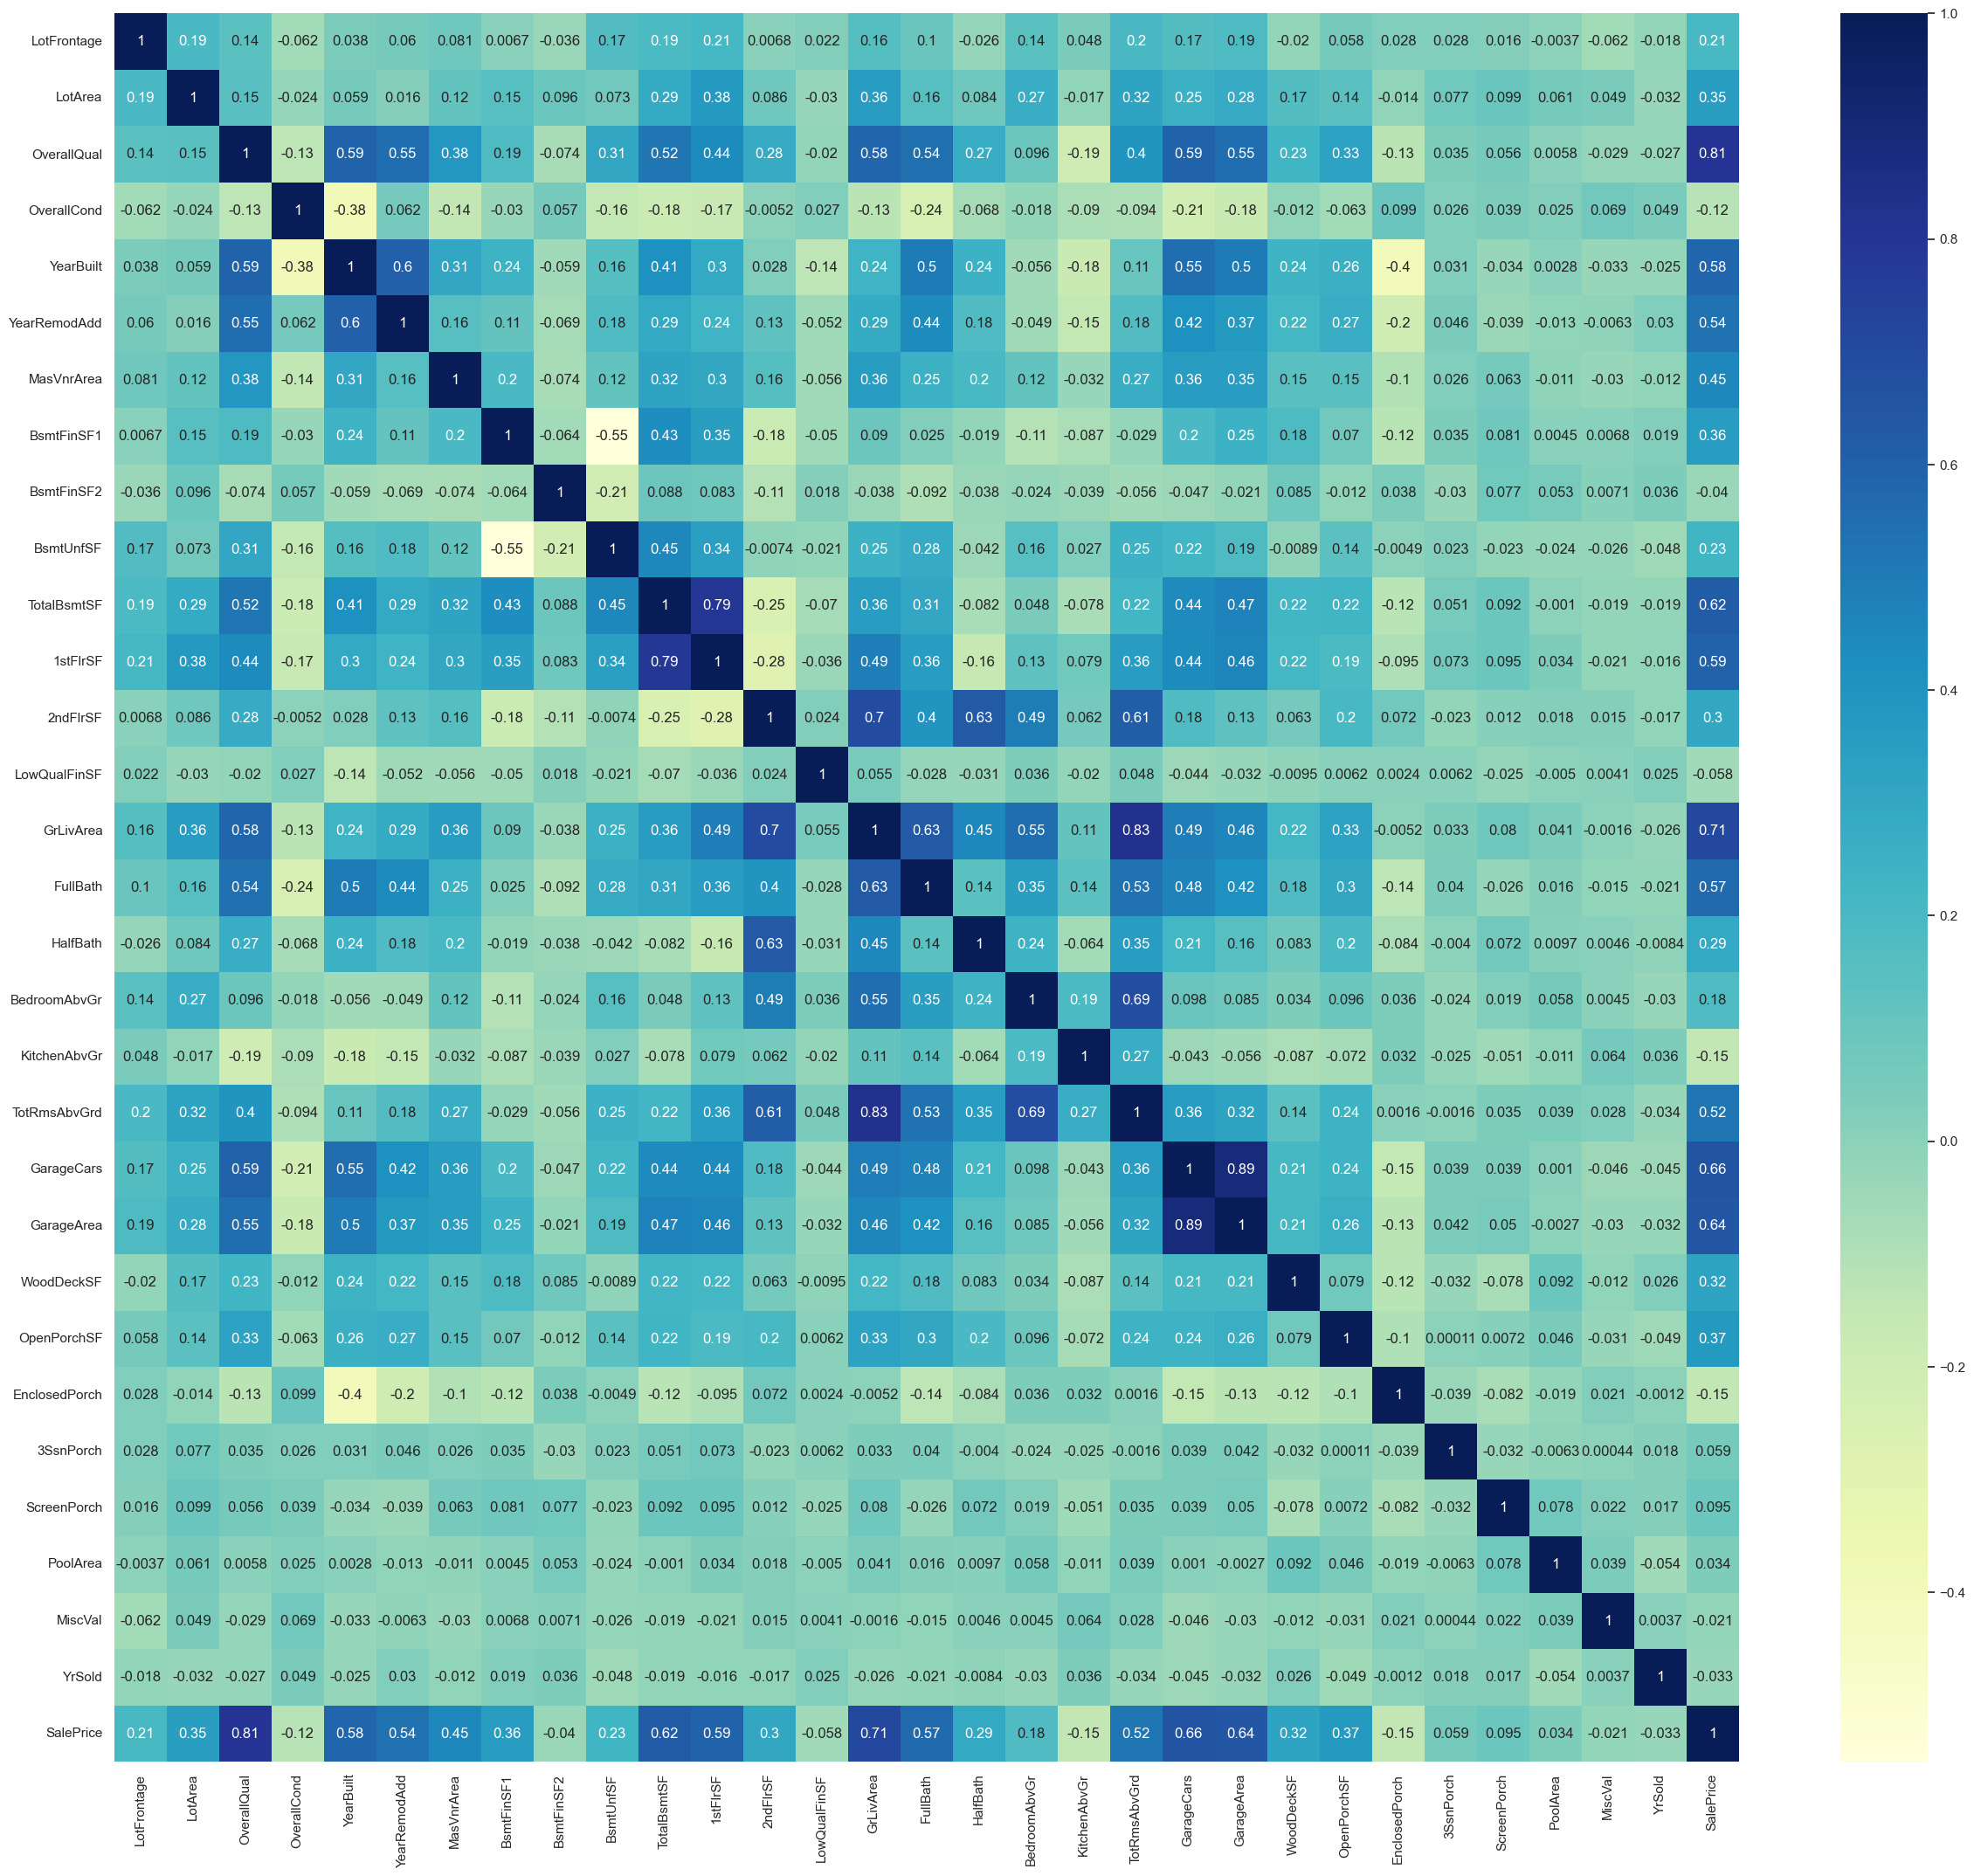

In [76]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 26))
sns.heatmap(house_numeric.corr(), annot = True, cmap="YlGnBu")
plt.show()

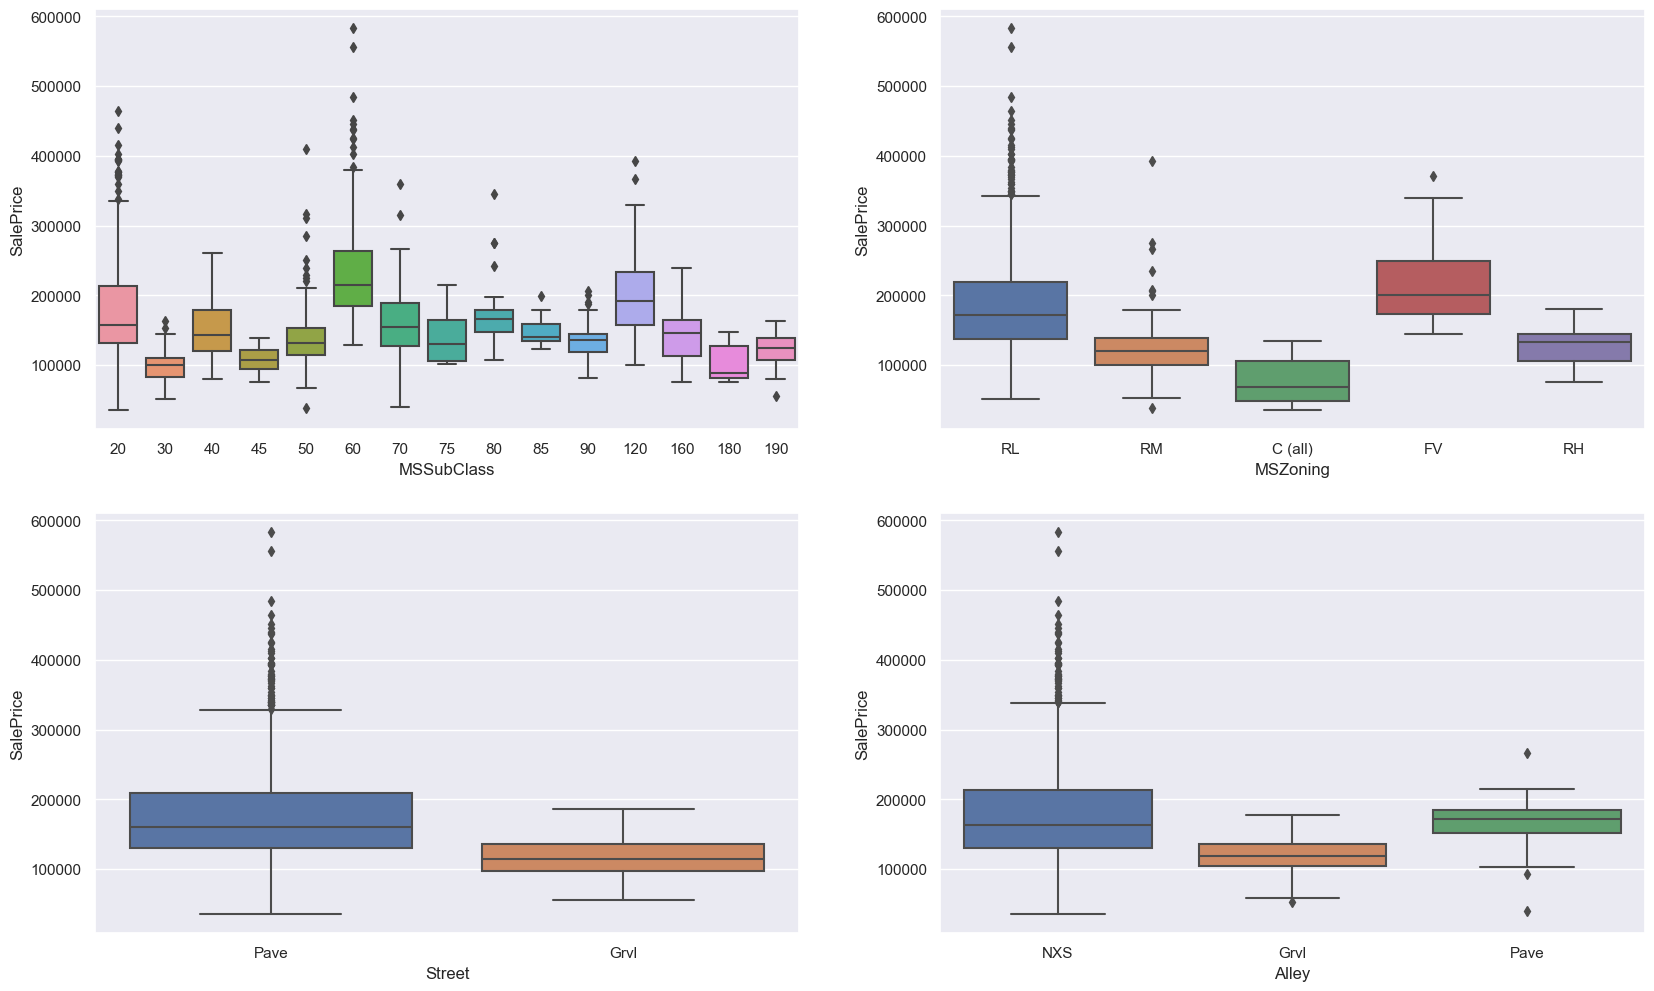

In [77]:
categorical_columns=house_categorical.columns

plt.figure(figsize=(20, 12))
for i in range(0,4):
  plt.subplot(2,2,i+1)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

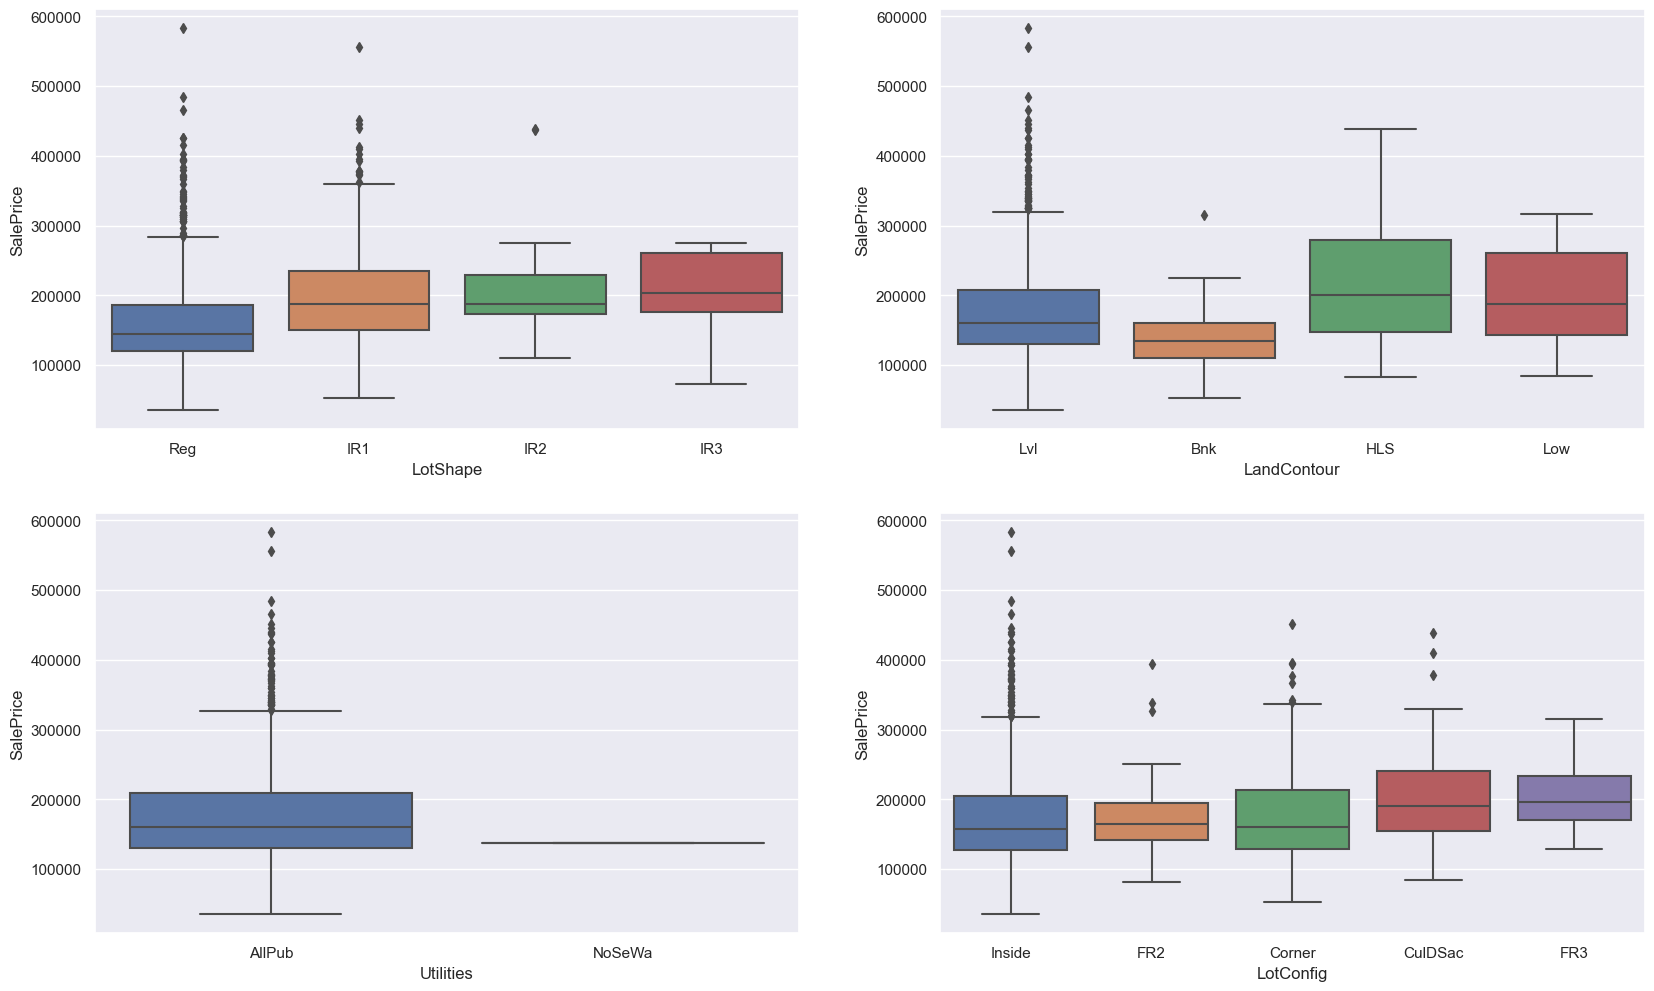

In [78]:
plt.figure(figsize=(20, 12))
for i in range(4,8):
  plt.subplot(2,2,i-3)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

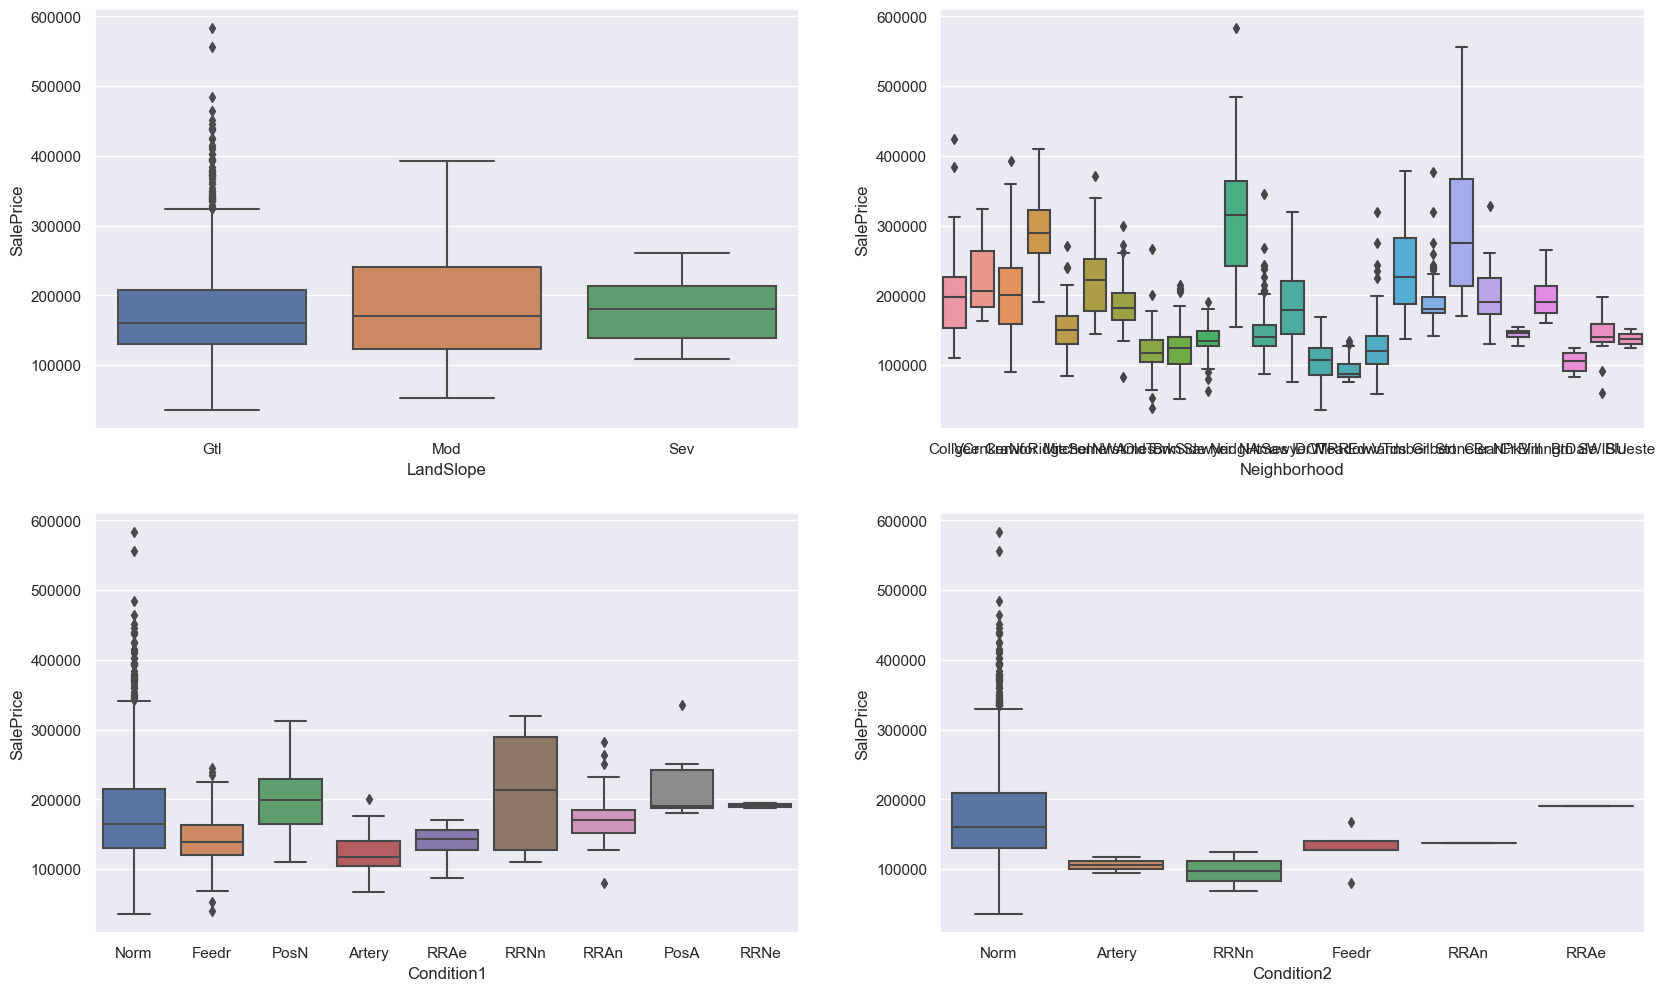

In [79]:
plt.figure(figsize=(20, 12))
for i in range(8,12):
  plt.subplot(2,2,i-7)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

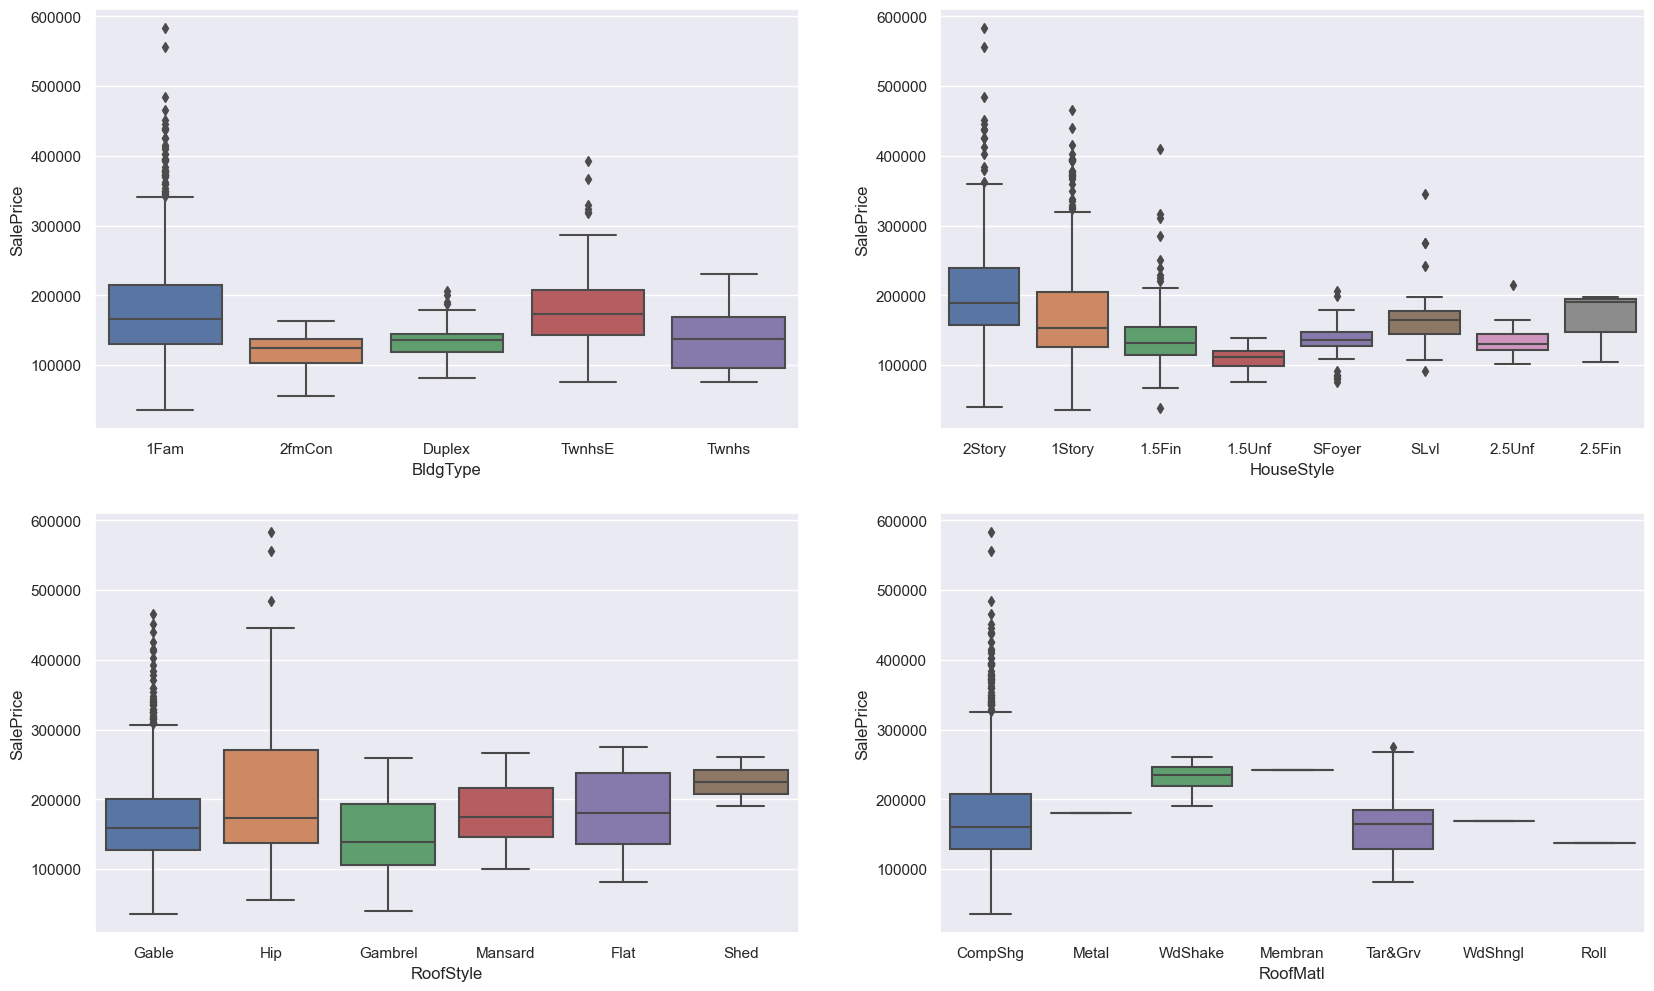

In [80]:
plt.figure(figsize=(20, 12))
for i in range(12,16):
  plt.subplot(2,2,i-11)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

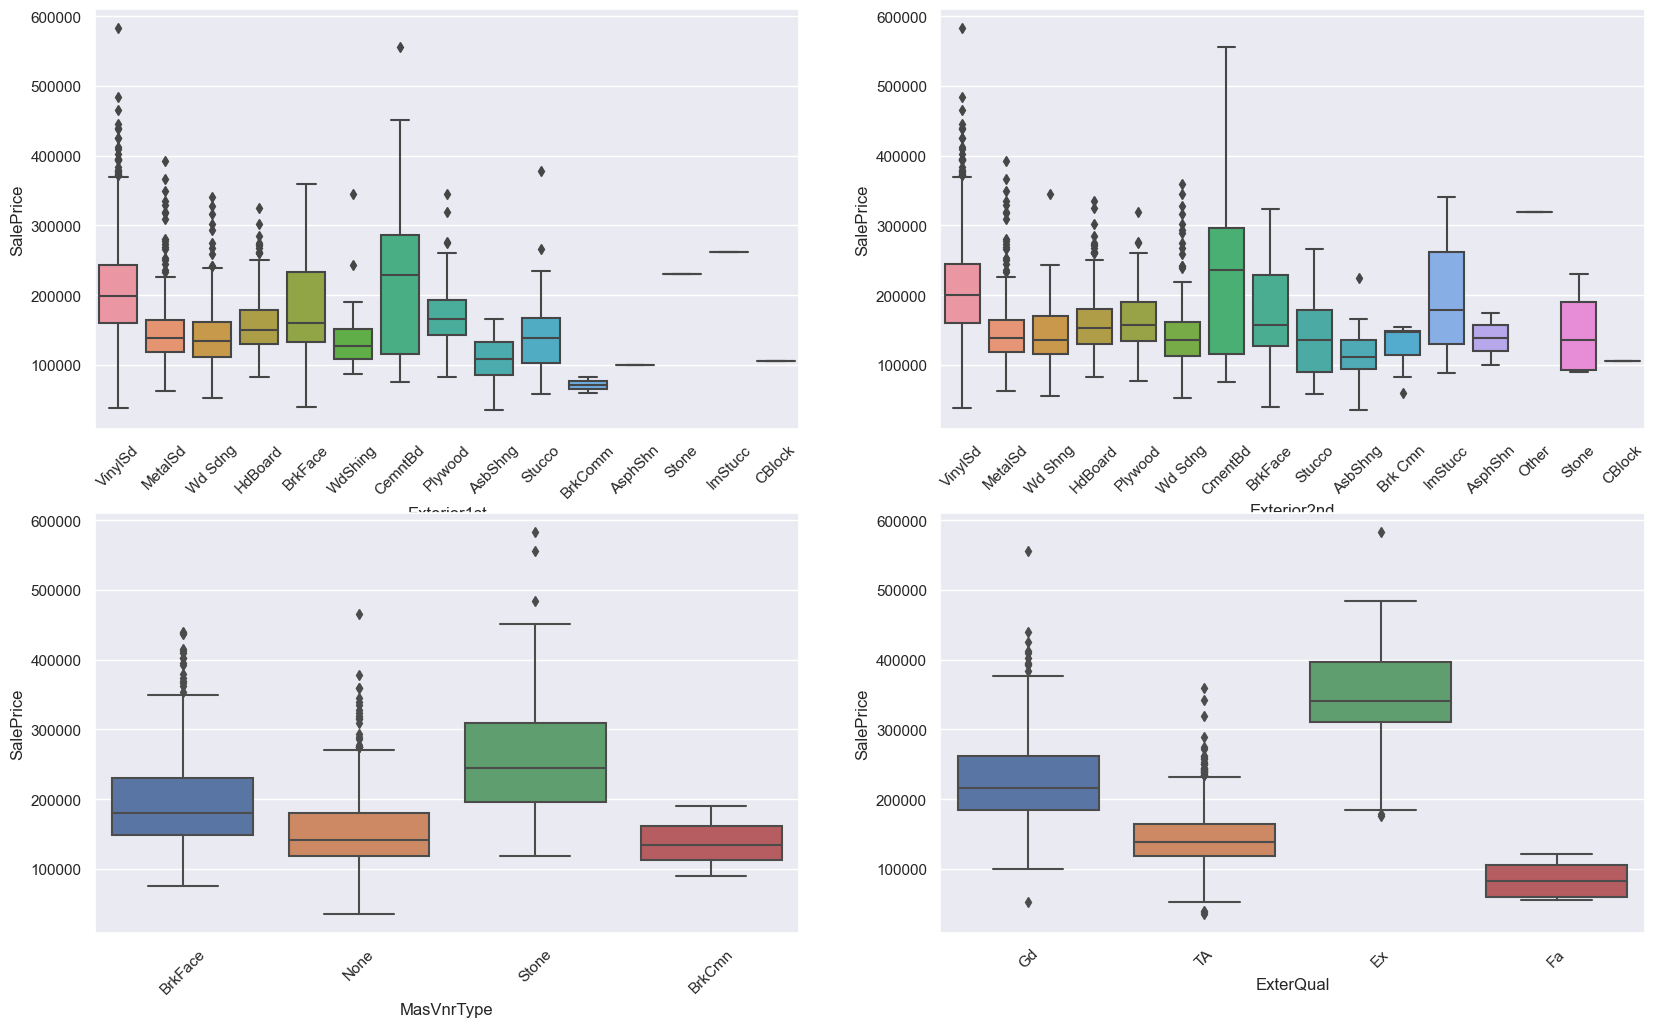

In [81]:
plt.figure(figsize=(20, 12))
for i in range(16,20):
  plt.subplot(2,2,i-15)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
  plt.xticks(rotation=45) 
plt.show()

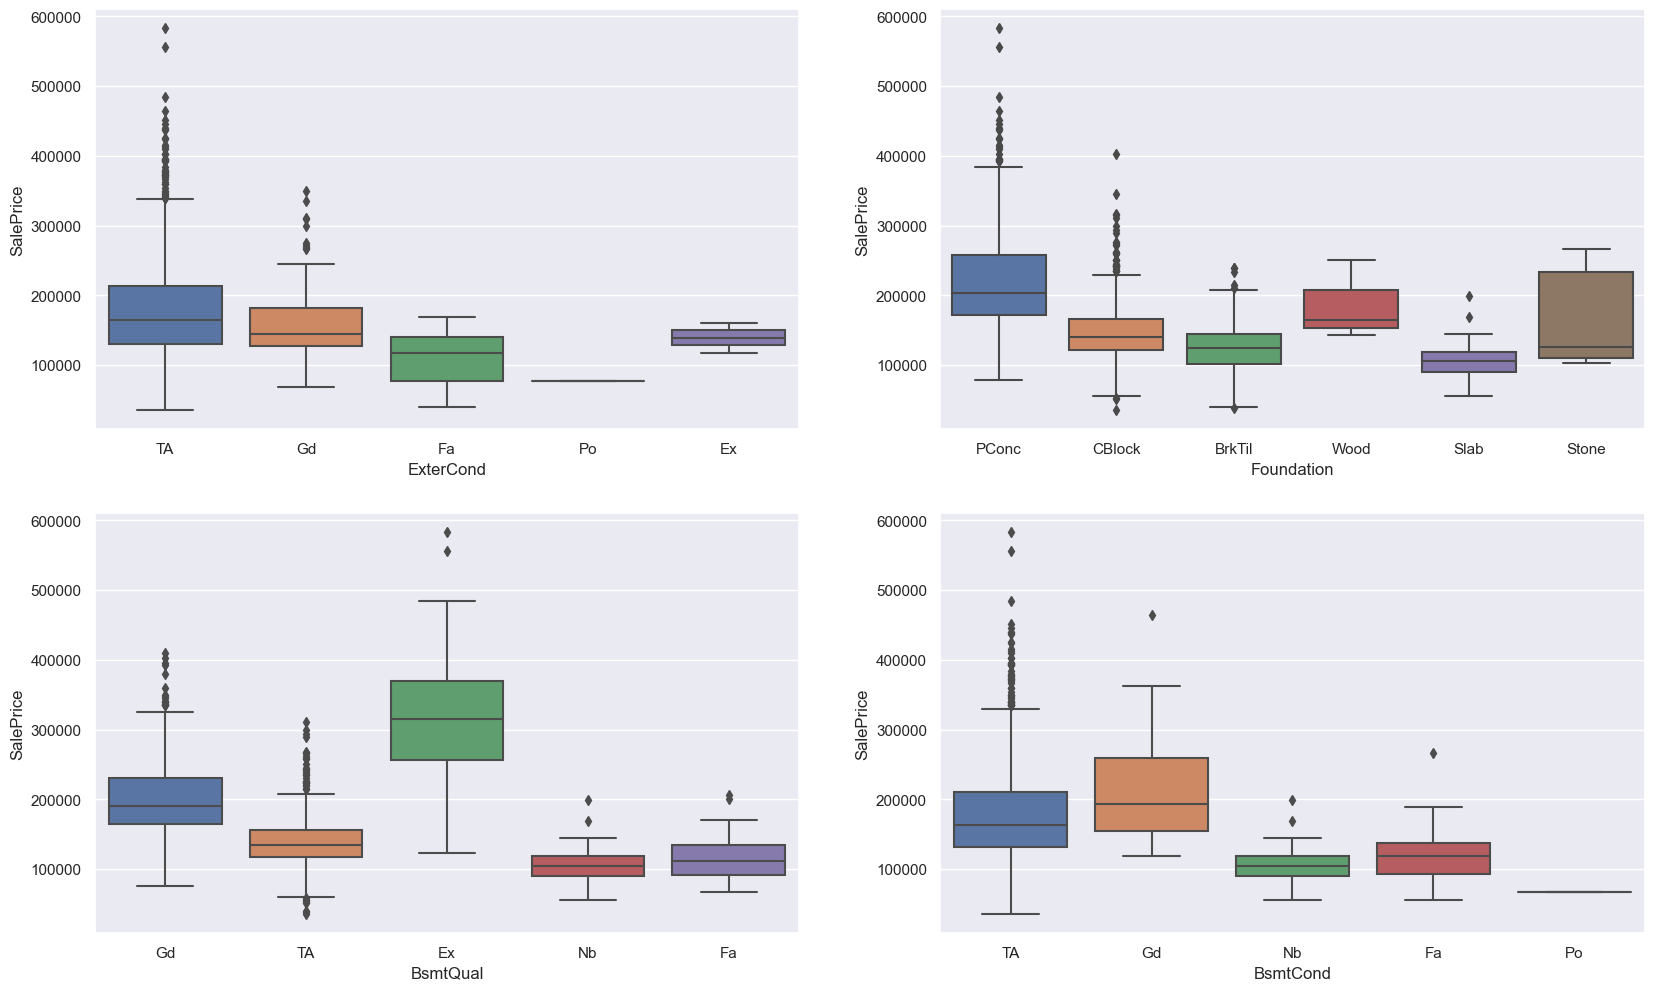

In [82]:
plt.figure(figsize=(20, 12))
for i in range(20,24):
  plt.subplot(2,2,i-19)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

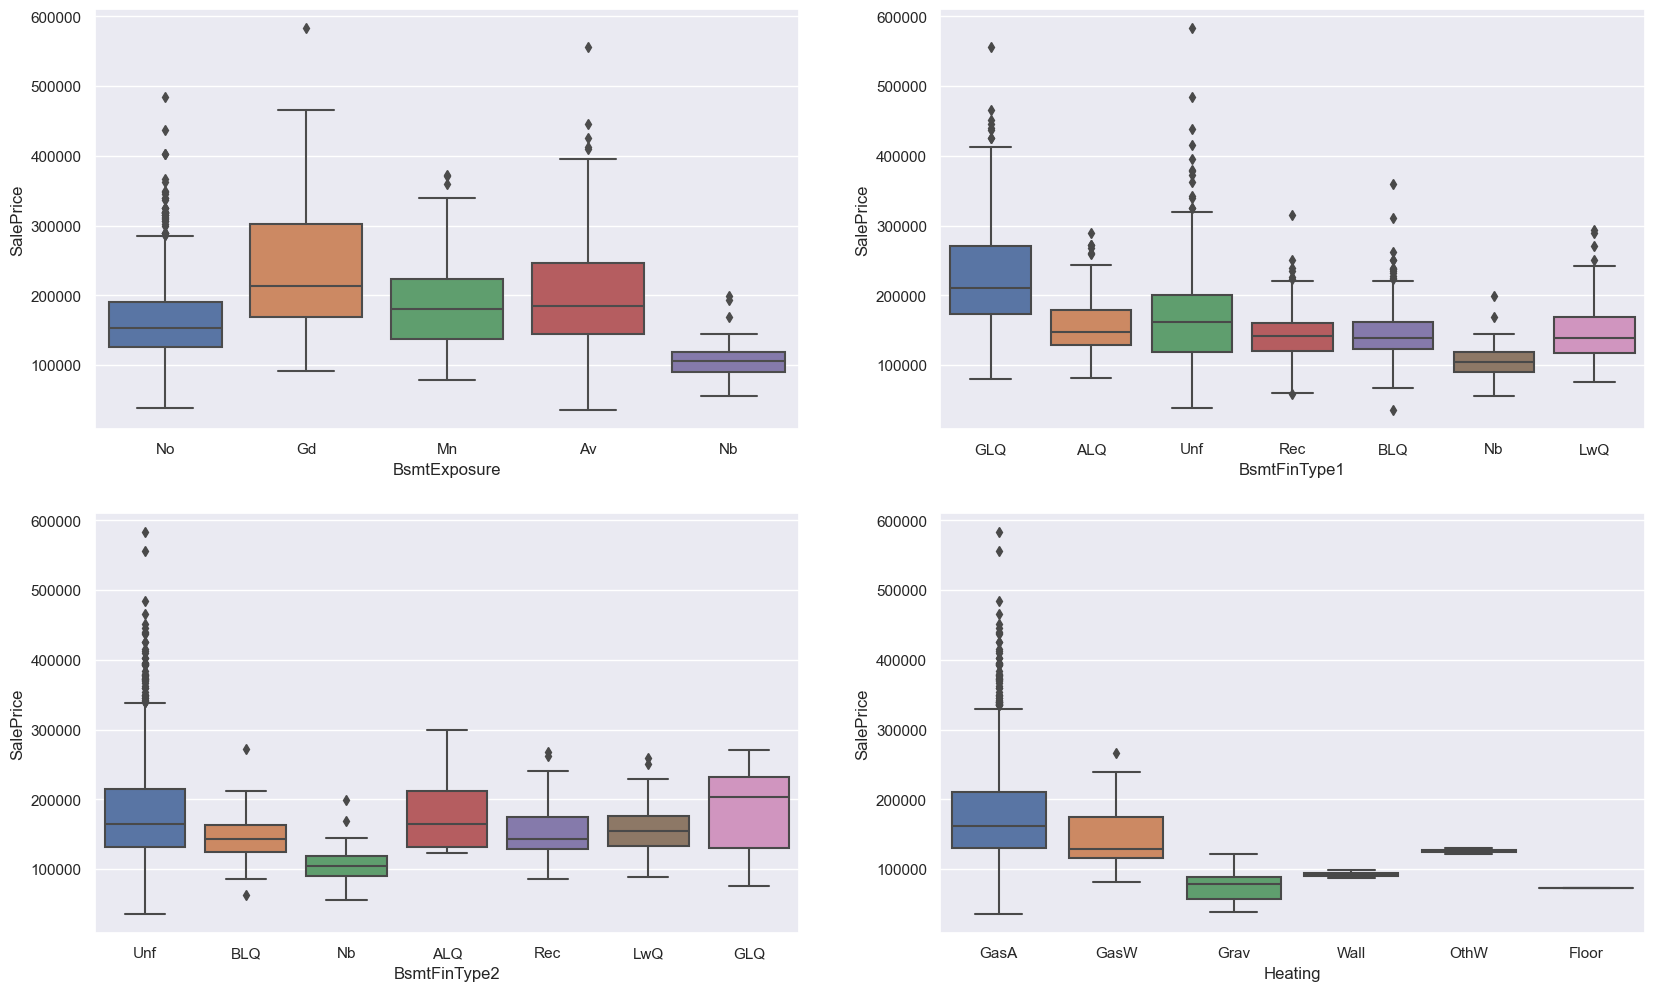

In [83]:
plt.figure(figsize=(20, 12))
for i in range(24,28):
  plt.subplot(2,2,i-23)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

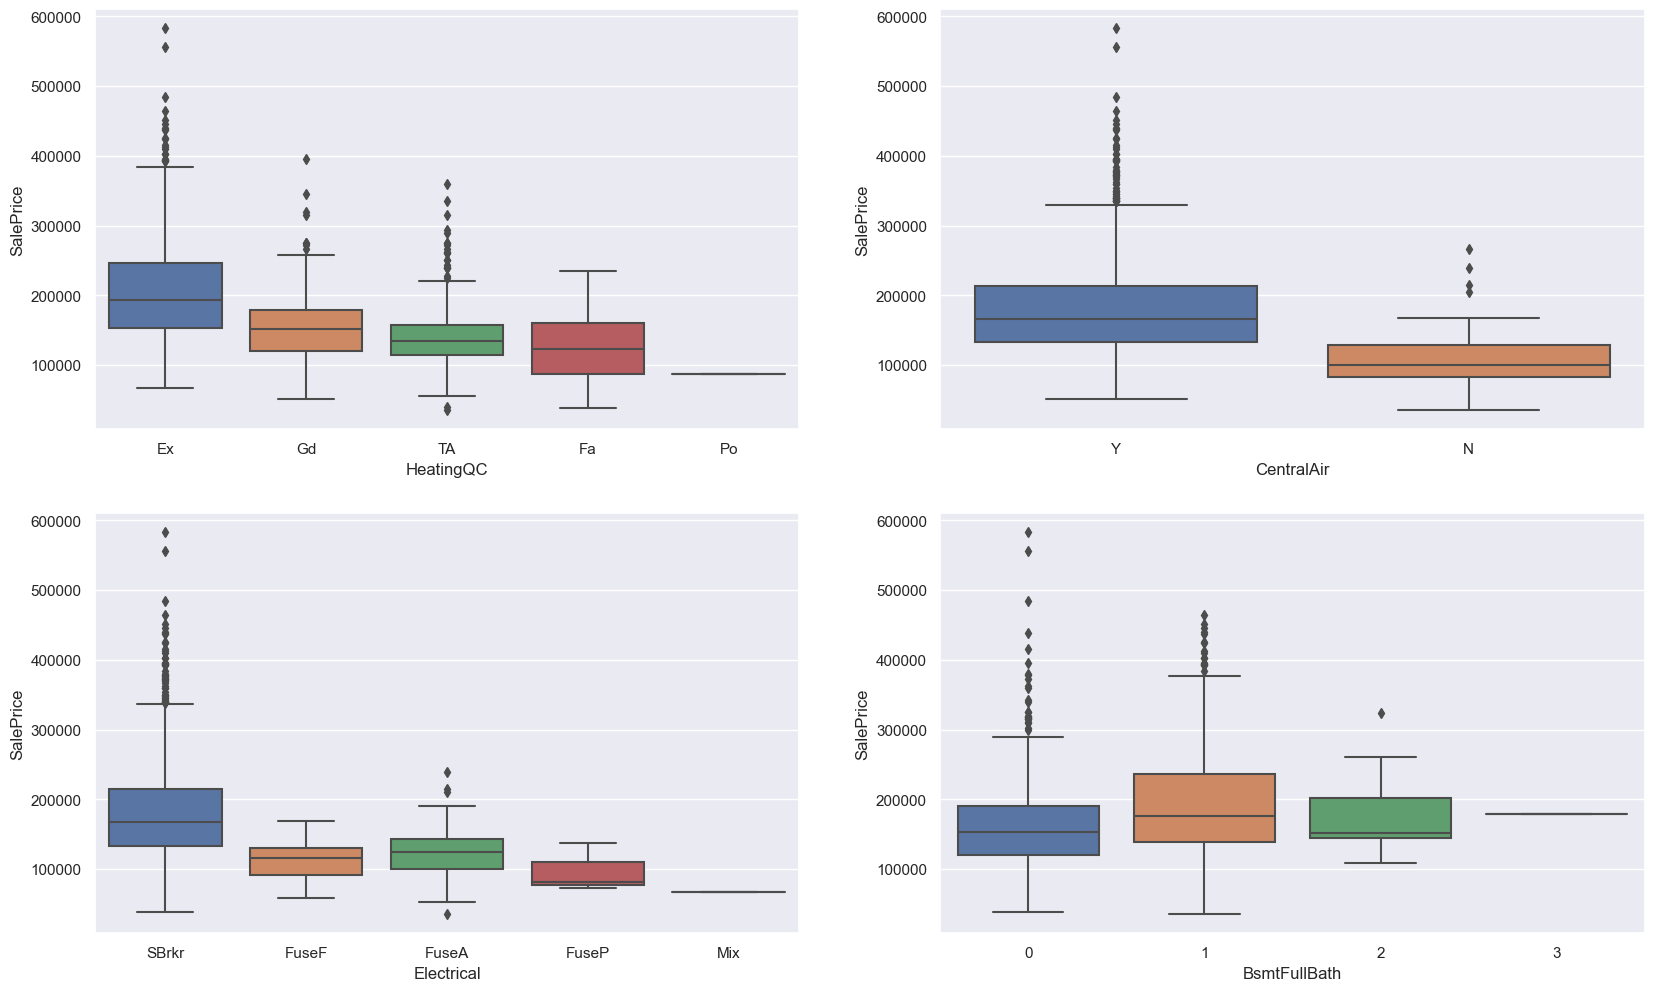

In [84]:
plt.figure(figsize=(20, 12))
for i in range(28,32):
  plt.subplot(2,2,i-27)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

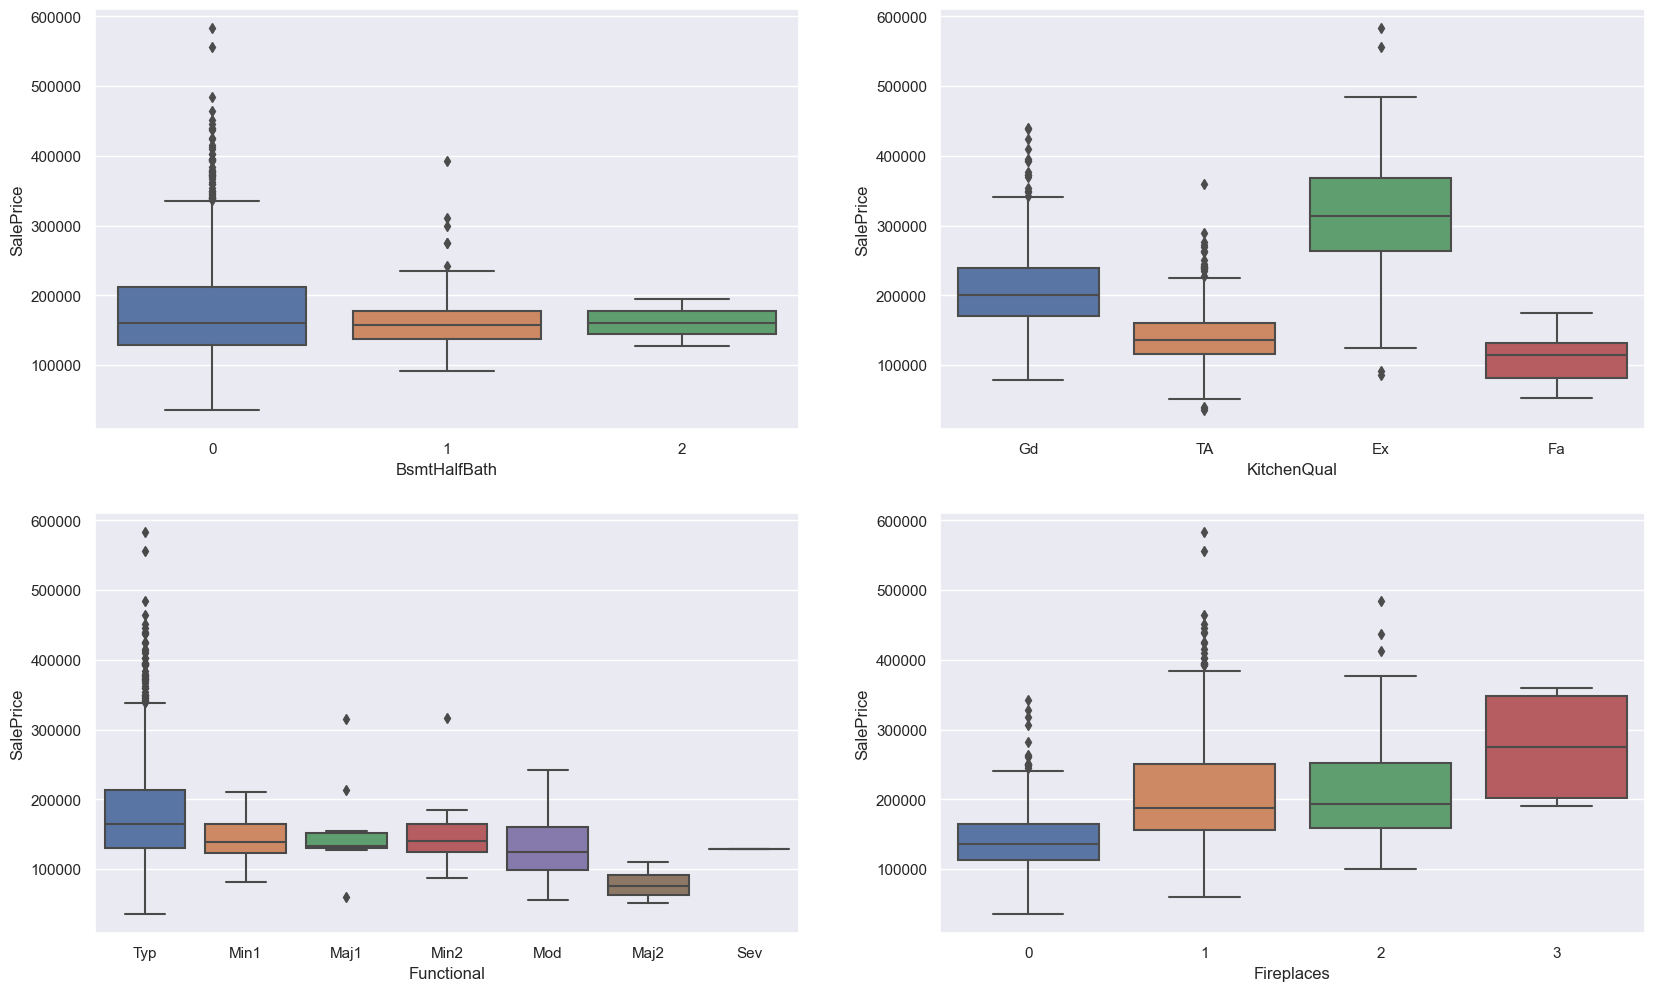

In [85]:
plt.figure(figsize=(20, 12))
for i in range(32,36):
  plt.subplot(2,2,i-31)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

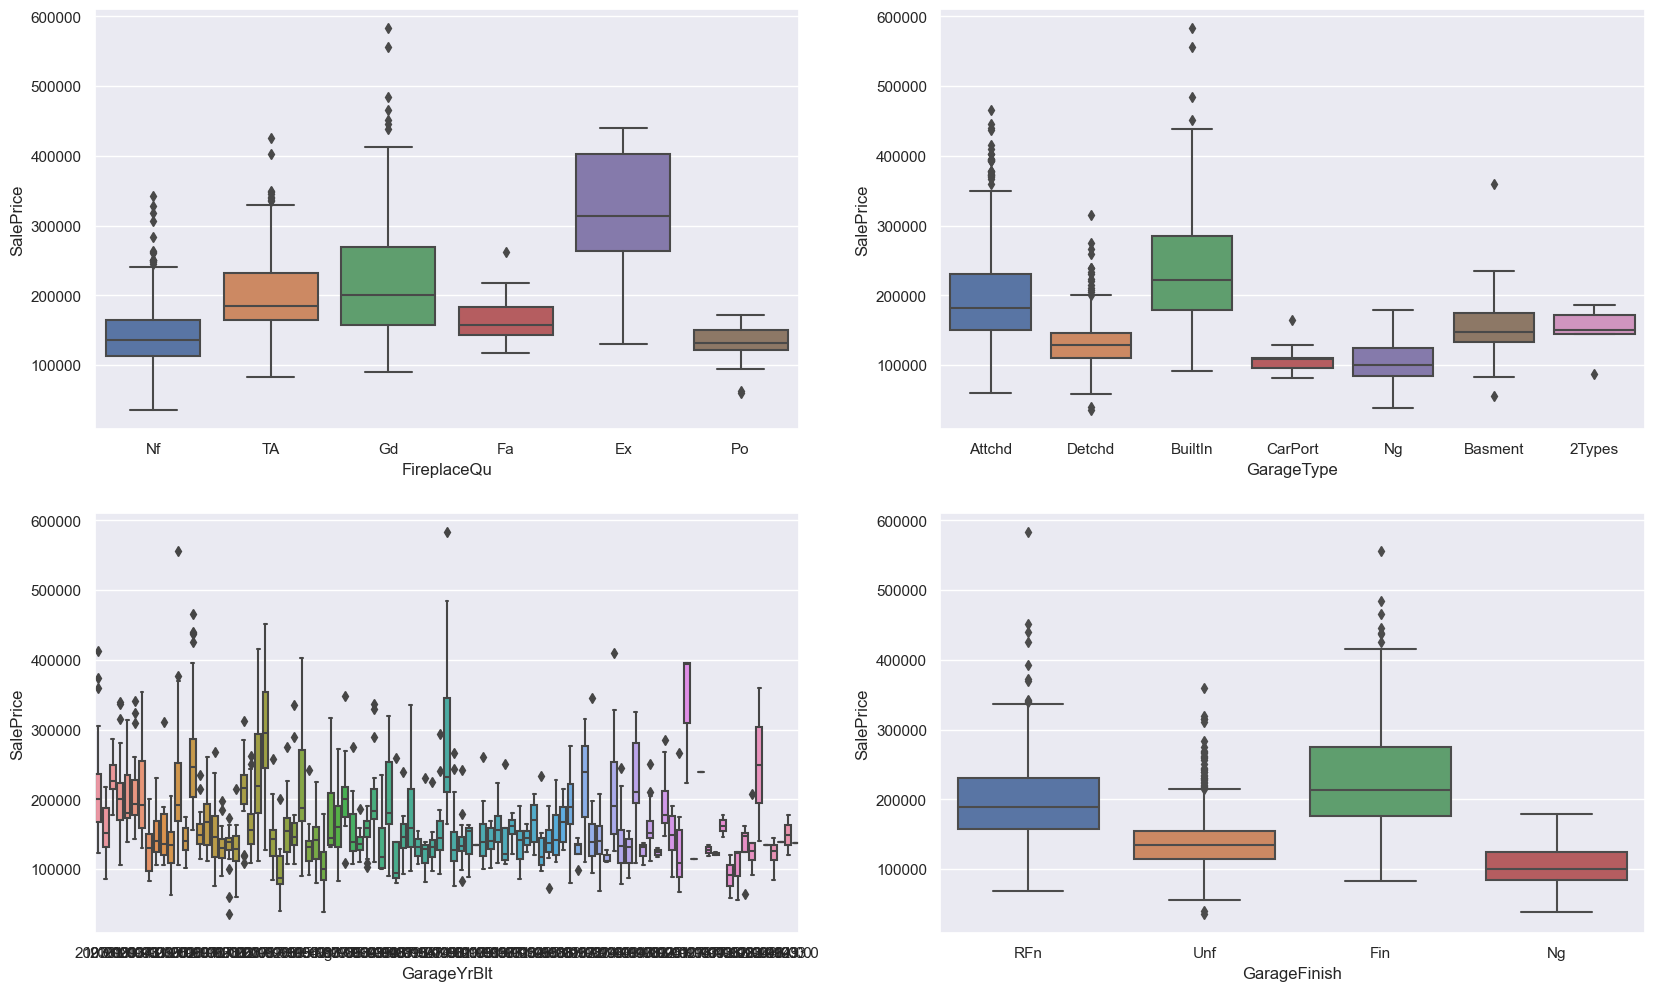

In [86]:
plt.figure(figsize=(20, 12))
for i in range(36,40):
  plt.subplot(2,2,i-35)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

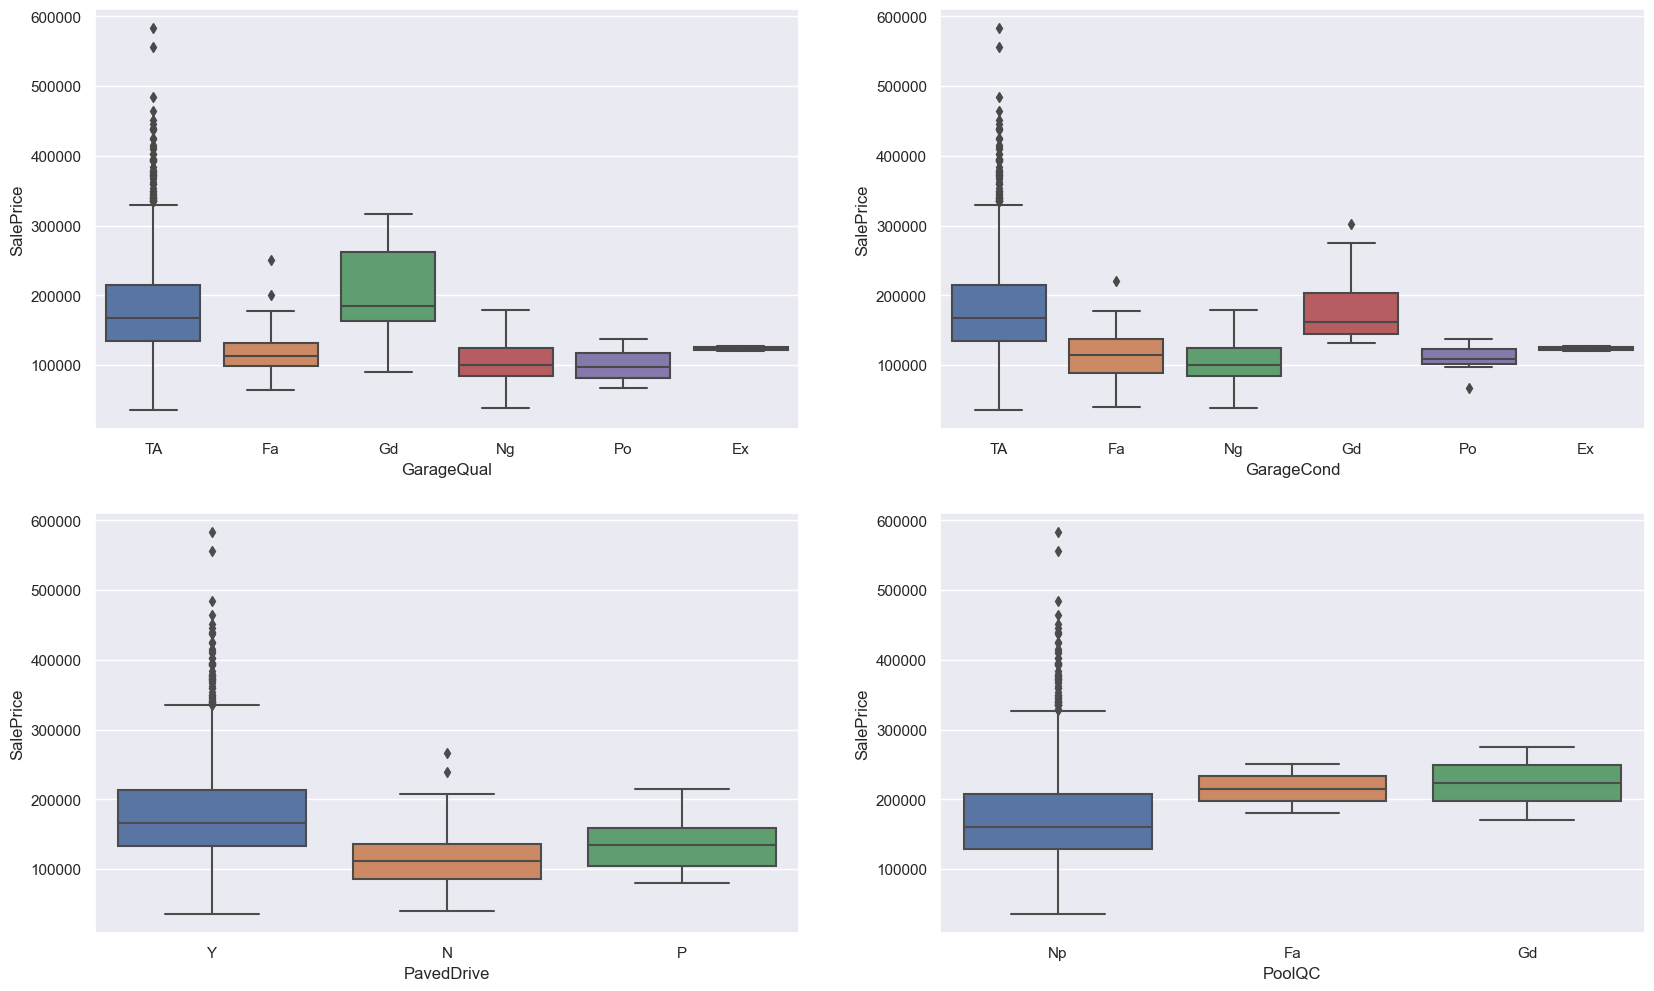

In [87]:
plt.figure(figsize=(20, 12))
for i in range(40,44):
  plt.subplot(2,2,i-39)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

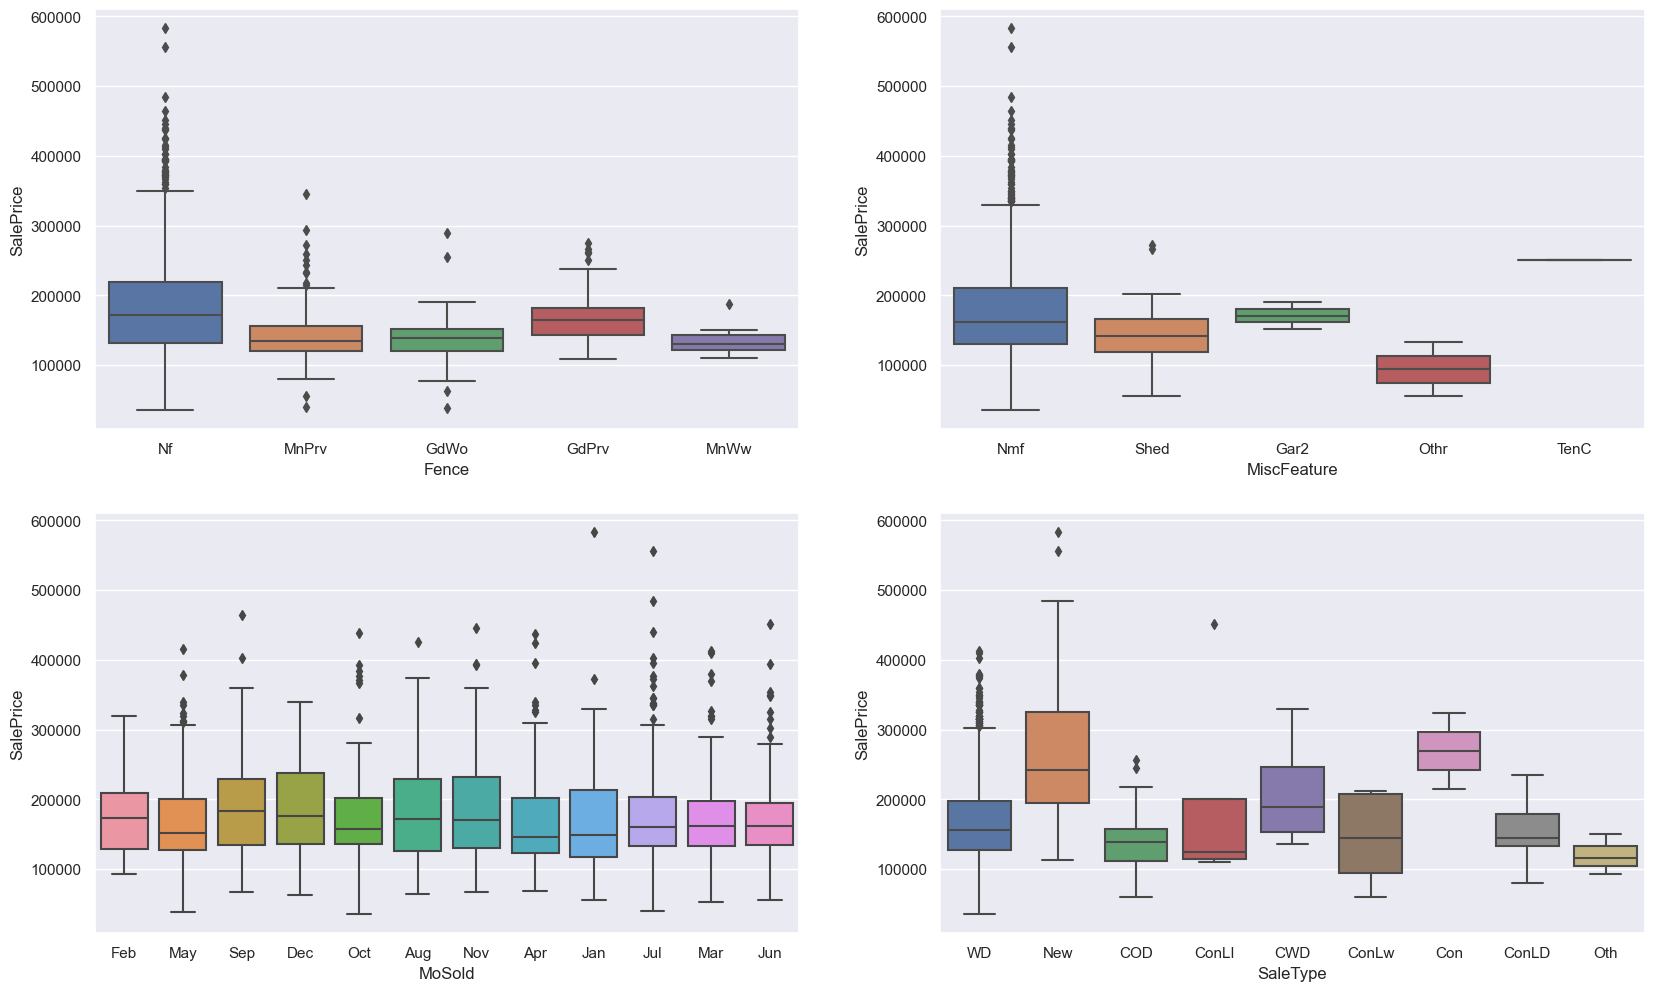

In [88]:
plt.figure(figsize=(20, 12))
for i in range(44,48):
  plt.subplot(2,2,i-43)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

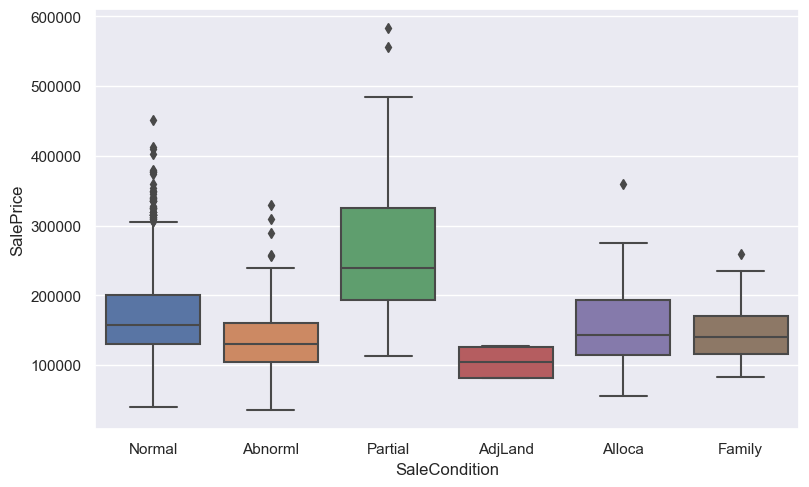

In [89]:
plt.figure(figsize=(20, 12))
for i in range(48,49):
  plt.subplot(2,2,i-47)
  sns.boxplot(x = categorical_columns[i], y = 'SalePrice', data = house)  
plt.show()

## Step 4: Data Preparation

### 4.1 Extracting X and y from data

In [90]:
# split into X and y
y = house_numeric.pop('SalePrice')
X = house_numeric

### 4.2 Dummy encoding for categorical columns

In [91]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NXS,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Nb,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Nb,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Nb,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Nb,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Nb,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Nf,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Ng,GarageYrBlt_1906.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0

In [92]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [93]:
X.shape

(1396, 378)

### 4.3 Scale values

In [94]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=378)

## Step 5: Split data into train and test

In [95]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Step 6: Build Model

**We will build multiple models and choose the best one from these models**

### 6.1 Building with all variables

#### 6.1.1 Linear Regression Model

In [96]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred_train = lm.predict(X_train)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

0.955524895297554
222708797169.6609
227951685.94642875


As we can see, the R-squared we are getting is really high. Let's check other models, since this model has more than 300 columns, ir might be overfit. So it would be better to have models that add penalty term and regularize out model

#### 6.1.2 Rigde Regression Model

In [98]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [100]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=500)

In [101]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

0.9314225037525165
343401365873.43567
351485533.1355534


The R-squared for is about 2% less than the previous model. RSS and MSE has also increased, so we will try one more Lasso model. As we have too many variables, lasso might prove better as it does feature selection as well.

#### 6.1.3 Lasso Regression Model

In [102]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [104]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [105]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

0.9253377154017337
373870903915.0238
382672368.38794655


Here, even though R-squared for train data has reduced a bit. We are getting more accuracy with less complexity here. Let's try these models with fewer number of variables

### 6.2 Building with top 100 variables

#### 6.2.1 Get top 100 variables using RFE

In [106]:
lm_100 = LinearRegression()
lm_100.fit(X_train, y_train)

rfe = RFE(lm_100, n_features_to_select=100)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [107]:
X_test_100 = X_test[X_train.columns[rfe.support_]]

In [108]:
X_train_100 = X_train[X_train.columns[rfe.support_]]

#### 6.2.2 Linear Regression Model

In [109]:
# Instantiate
lm_100 = LinearRegression()

# Fit a line
lm_100.fit(X_train_100, y_train)

LinearRegression()

In [110]:
y_pred_train = lm_100.predict(X_train_100)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

0.931523009089532
342898086052.83453
350970405.3764939


The R-squared has reduced and errors are increased. We will try other models.

#### 6.2.3 Ridge Regression Model

In [111]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_100 = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge_100, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_100, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [113]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 50
ridge_100 = Ridge(alpha=alpha)

ridge_100.fit(X_train_100, y_train)

Ridge(alpha=50)

In [114]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_100.predict(X_train_100)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

0.9284348702385166
358361921238.92065
366798281.7184449


The R-squared has reduced a bit. RSS and MSE has also increased. We will try one more Lasso model. As we have too many variables, lasso might prove better as it does feature selection as well.

#### 6.2.4 Lasso Regression Model

In [115]:
lasso_100 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso_100, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_100, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [117]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso_100 = Lasso(alpha=alpha)
        
lasso_100.fit(X_train_100, y_train) 

Lasso(alpha=500)

In [118]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_100.predict(X_train_100)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

0.9236817496394146
382163141685.9657
391159817.48819417


This gives the best R-squared till now and the errors are also significantly less. Let's try with fewer variables.

### 6.3 Building with top 100 variables

#### 6.3.1 Get top 50 variables using RFE

In [119]:
lm_50 = LinearRegression()
lm_50.fit(X_train, y_train)

rfe = RFE(lm_50, n_features_to_select=50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [120]:
X_test_50 = X_test[X_train.columns[rfe.support_]]

In [121]:
X_train_50 = X_train[X_train.columns[rfe.support_]]

#### 6.3.2 Linear Regression Model

In [122]:
# Instantiate
lm_50 = LinearRegression()

# Fit a line
lm_50.fit(X_train_50, y_train)

LinearRegression()

In [123]:
y_pred_train = lm_50.predict(X_train_50)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

0.711703384759029
1443643423393.0
1477628887.812692


Here also, R-squared is very poor. We will see other models

#### 6.3.3 Ridge Regression Model

In [124]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_50 = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge_50, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_50, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [126]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 50
ridge_50 = Ridge(alpha=alpha)

ridge_50.fit(X_train_50, y_train)

Ridge(alpha=50)

In [127]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_50.predict(X_train_50)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

0.7445033934445808
1279397593498.1475
1309516472.3624847


The R-squared is poor than the previous models

#### 6.3.4 Lasso Regression Model

In [128]:
lasso_50 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso_50, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_50, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [130]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised

alpha =1000

lasso_50 = Lasso(alpha=alpha)
        
lasso_50.fit(X_train_50, y_train) 

Lasso(alpha=1000)

In [131]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_50.predict(X_train_50)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

0.7424387225166373
1289736419724.4111
1320098689.584863


The R-squared is very less compared to the that of 100 variables model. We will probably pick the model with 100 variables only. 

### 6.4 Pick the best Model

Comparing the model metrics and picking the best one

In [132]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score_all','RSS_all', 'MSE_all','R2 Score_100','RSS_100','MSE_100','R2 Score_50','RSS_50','MSE_50'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score_all,9.555249e-01,9.314225e-01,9.253377e-01
1,RSS_all,2.227088e+11,3.434014e+11,3.738709e+11
2,MSE_all,1.509807e+04,1.874795e+04,1.956201e+04
3,R2 Score_100,9.315230e-01,9.284349e-01,9.236817e-01
4,RSS_100,3.428981e+11,3.583619e+11,3.821631e+11
5,MSE_100,1.873420e+04,1.915198e+04,1.977776e+04
6,R2 Score_50,7.117034e-01,7.445034e-01,7.424387e-01
7,RSS_50,1.443643e+12,1.279398e+12,1.289736e+12
8,MSE_50,3.843994e+04,3.618724e+04,3.633316e+04


According to the above table, stats for 50 variables is looking worst. We will skip it definitely. And stats of Linear Regression are looking best for all the variables, but it looks like overfitting. And since we have too many variables, we will choose the lasso regression.

In the lasso regression also, to make the model a little bit less complex, we will use the one with 100 variables only.

So our final model will be 'lasso_100'.

Let's perform residual analysis of the final model before making predictions.

## Step 7: Residual Analysis of the train data

In [133]:
y_train_pred = lasso_100.predict(X_train_100)

### Histogram

So, now to check if the error terms are also normally distributed, plotting the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

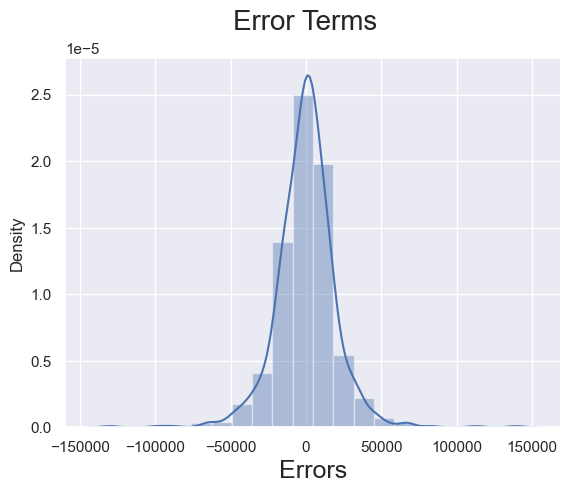

In [134]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

As seen in the graph, the errors are normally distributed and centered around at 0. i.e., the mean of errors is 0.

### Scatter Plot

Plot scatter plot for error values and see how they are scattered to confirm that there are no patterns present in the errors

Text(0, 0.5, 'Errors')

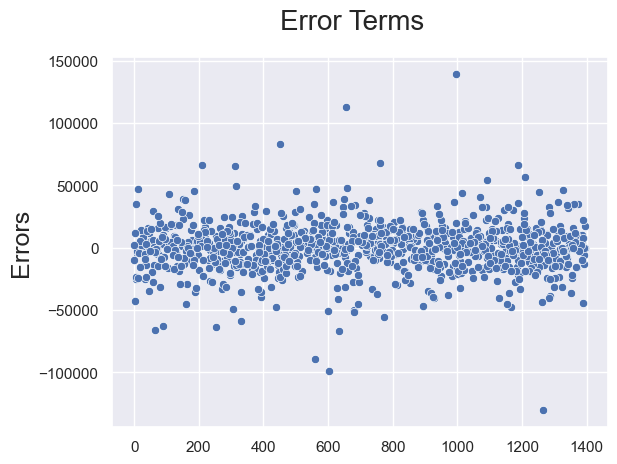

In [135]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(y=(y_train - y_train_pred),x=X_train_100.index)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.ylabel('Errors', fontsize = 18)                         # X-label

Error terms are equally distributed around zero in both the directions. There are no patterns as well

## Step 8: Making Predictions Using the Final Model

After having fitted the model and checked the normality of error terms, making predictions using the final, i.e. lasso model with 100 variables.

In [136]:
# Making predictions using the final model

y_pred_lasso_100 = lasso_100.predict(X_test_100)

## Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

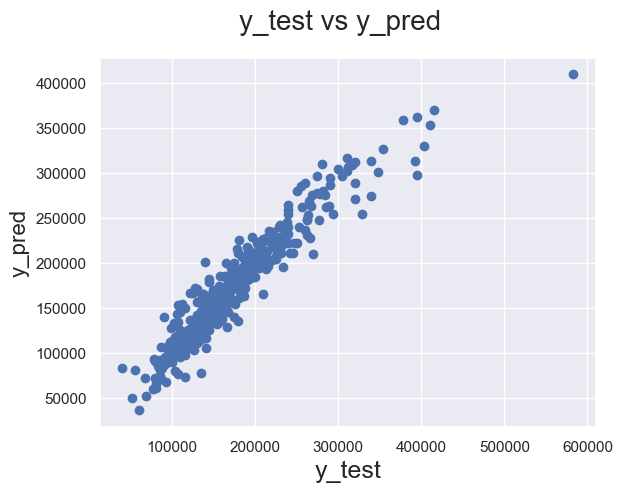

In [137]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lasso_100)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [138]:
r2_score(y_test, y_pred_lasso_100)

0.8993560163329302

We can see that there is a linear relationship between original and predicted values. And R-squared for predicted values is also `0.899`. So this looks like a decent model overall.

## Step 10: Identify significant variables

In [141]:
betas = pd.DataFrame(index=X_train_100.columns)

betas.rows = X_train_100.columns

betas['Lasso'] = lasso_100.coef_

pd.set_option('display.max_rows', None)
betas

,Lasso
LotArea,3.107359e+03
OverallQual,1.196987e+04
OverallCond,5.544069e+03
YearBuilt,7.533049e+03
YearRemodAdd,2.745074e+03
BsmtFinSF1,7.190896e+03
BsmtFinSF2,0.000000e+00
BsmtUnfSF,-0.000000e+00
TotalBsmtSF,8.185471e+03
1stFlrSF,0.000000e+00


According to the data of coefficients, the 5 most significant variables are: 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'BsmtFinSF1', 'YearBuilt' 

All these variables are positively affecting the sales price of the house